<center><h1 dir="auto">الانحدار الخطي</h1></center>


 <h2 dir="auto">الأهداف</h2>


| |
|--------------|
|**وصف النمذجة الإحصائية  للانحدار البسيط o**|
|**$\huge \hat{y}= \color{red}{\beta_0} + \color{red}{\beta_1}x :$  شرح الانحدار الخطي البسيط كحل للمعادلة  o**|
|**$\huge y$	رسم خط الانحدار على أساس الميل وتقاطع o**|
|**التنبؤ بمخرجات نموذج انحدار خطي لبيانات جديدة o**|

 <h1 dir="auto"> المقدمة</h1>

![](Labs/LinearRegression/linear_R1.jpg)


![drawing](Labs/LinearRegression/LinearRegreassion_3.png)


![drawing](Labs/LinearRegression/Linear_Regression_7.png)

$\huge \beta_0 :$ y تقاطع 

$\huge \beta_1 :$  الميل 

$\huge \bar y  :$ y متوسط 

$\huge \bar x :$  x متوسط

$\huge r :$  معامل الارتباط

$\huge S_x :$ x انحدار معياري 

$\huge S_y :$  y انحدار معياري  

In [15]:
getwd()

[1] "/Users/medamin/Projets/DataScience"

In [165]:
rm(list=ls())

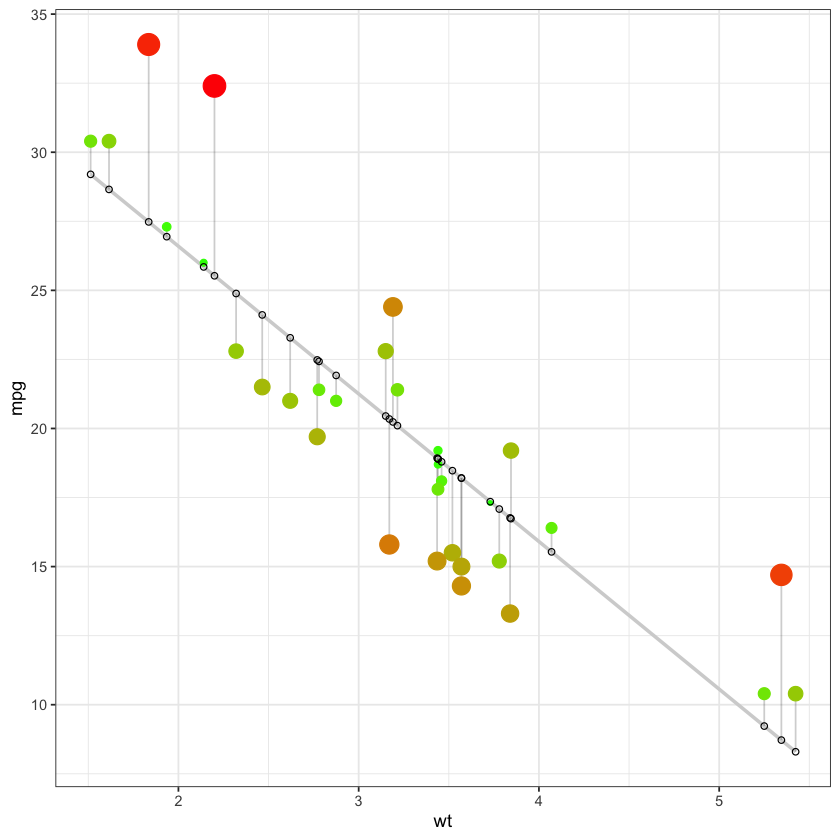

In [130]:
d <- mtcars
fit <- lm(mpg ~ wt, data = d) # fit the model
d$predicted <- predict(fit)   # Save the predicted values
d$residuals <- residuals(fit) # Save the residual values
ggplot(d, aes(x = wt, y = mpg)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +     # regression line  
  geom_segment(aes(xend = wt, yend = predicted), alpha = .2) +      # draw line from point to line
  geom_point(aes(color = abs(residuals), size = abs(residuals))) +  # size of the points
  scale_color_continuous(low = "green", high = "red") +             # colour of the points mapped to residual size - green smaller, red larger
  guides(color = FALSE, size = FALSE) +                             # Size legend removed
  geom_point(aes(y = predicted), shape = 1) +
theme_bw()

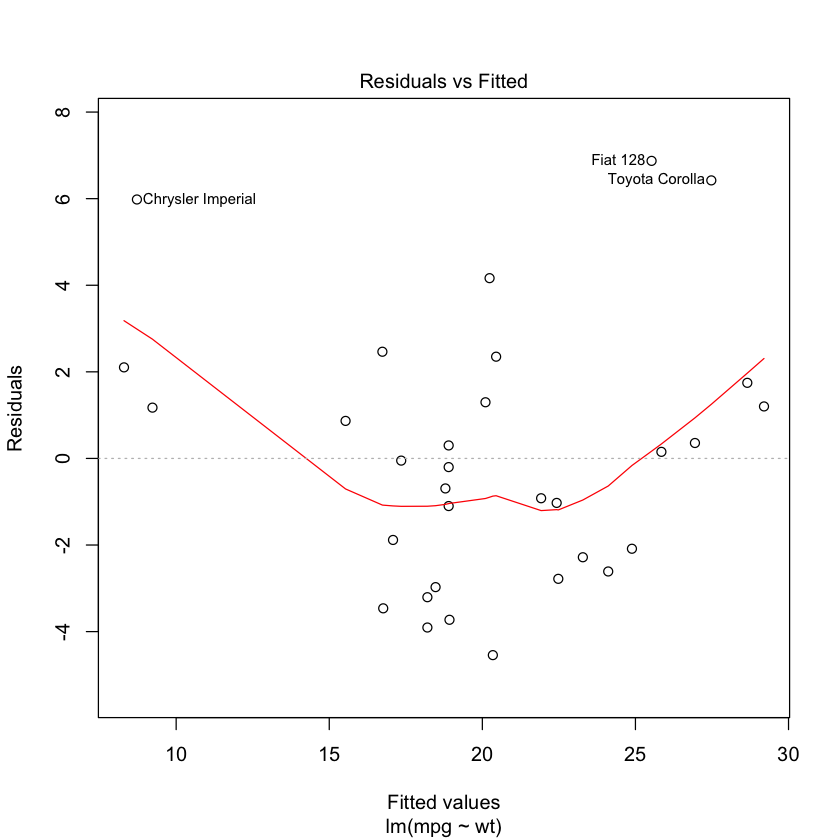

In [131]:
plot(fit, which=1)

In [1]:
library(help="datasets")

In [63]:
library(help="datasets")

![](Labs/LinearRegression/iris.png)

In [2]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [3]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [4]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [5]:
unique(iris$Species)

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

In [6]:
attach(iris)

In [7]:
levels(Species)

[1] "setosa"     "versicolor" "virginica"

In [8]:
is.factor(Species)

[1] TRUE

In [9]:
install.packages("GGally")


The downloaded binary packages are in
	/var/folders/hw/83xf1jxs0b58xft1b6ghk0280000gn/T//RtmpRZScjL/downloaded_packages


In [11]:
library(ggplot2)
library(GGally)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



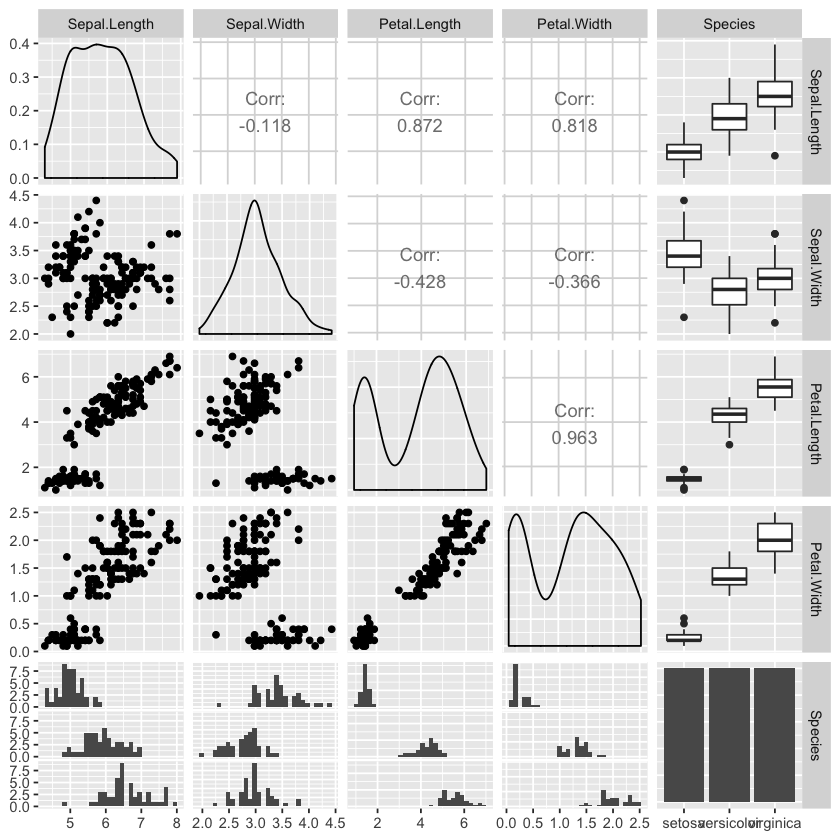

In [12]:
ggpairs(iris)

In [13]:
cor(Petal.Length, Petal.Width)
# Pearson correlation 

[1] 0.9628654

$$\Large  r=\frac{\sum(x_i - \bar{x})(y_i-\bar{y})}{\sqrt{\sum (x_i -\bar{x})^2}\sqrt{\sum (y_i -\bar{y})^2}}$$

In [18]:
(r<- cor.test(Petal.Length, Petal.Width))


	Pearson's product-moment correlation

data:  Petal.Length and Petal.Width
t = 43.387, df = 148, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9490525 0.9729853
sample estimates:
      cor 
0.9628654 


### t-statitics
$$ \huge t=\frac{r}{\sqrt{1-r^2}}\sqrt{n-2}  $$

In [54]:
(ttest<-t.test(Petal.Length, Petal.Width))


	Welch Two Sample t-test

data:  Petal.Length and Petal.Width
t = 16.297, df = 202.69, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.249107 2.868227
sample estimates:
mean of x mean of y 
 3.758000  1.199333 


In [33]:
ttest$statistic

t 
16.29739

In [35]:
 range(Petal.Length)

[1] 1.0 6.9

In [19]:
r$estimate

cor 
0.9628654

In [21]:
(t_value<- r$estimate*sqrt(150-2)/sqrt(1-r$estimate^2))

cor 
43.38724

- display names , conf.int  which infroms us abou tthe confidence interval of the correlation . 

In [22]:
names(r)

[1] "statistic"   "parameter"   "p.value"     "estimate"    "null.value" 
[6] "alternative" "method"      "data.name"   "conf.int"

In [25]:
round(r$conf.int,3)

[1] 0.949 0.973
attr(,"conf.level")
[1] 0.95

In [26]:
r$p.value

[1] 4.675004e-86

In [27]:
r$alternative

[1] "two.sided"

In [56]:
(ttest<-t.test(Petal.Length, Petal.Width, alternative = "greater"))


	Welch Two Sample t-test

data:  Petal.Length and Petal.Width
t = 16.297, df = 202.69, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 2.299241      Inf
sample estimates:
mean of x mean of y 
 3.758000  1.199333 


In [45]:
library(dplyr)
iris %>%
    group_by( Species) %>%
    summarise( count=n(),
                 mean=mean(Petal.Length),
                 sd=sd(Petal.Length))

Species,count,mean,sd
<fct>,<int>,<dbl>,<dbl>
setosa,50,1.462,0.1736640
versicolor,50,4.260,0.4699110
virginica,50,5.552,0.5518947


In [53]:
var.test(Petal.Length ~ Petal.Width, data=iris)

ERROR: Error in var.test.formula(Petal.Length ~ Petal.Width, data = iris): grouping factor must have exactly 2 levels


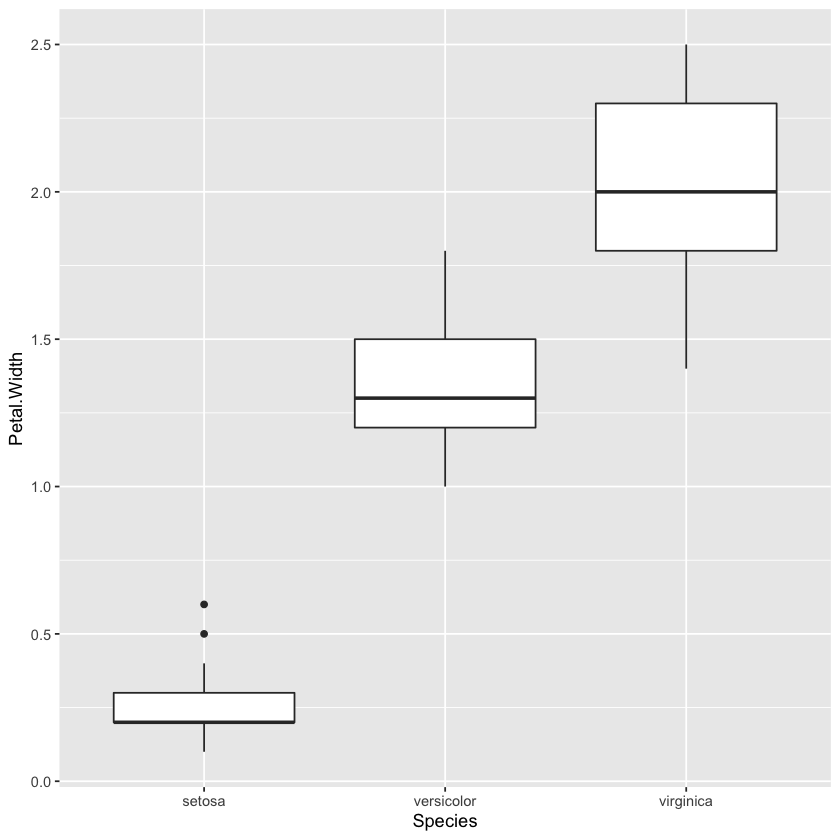

In [65]:
ggplot(iris, aes(Species, Petal.Width))+
geom_boxplot()

In [17]:
unique(iris$Species)

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

In [18]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [19]:
glimpse(iris)

ERROR: Error in glimpse(iris): could not find function "glimpse"


In [20]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [21]:
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

In [22]:
is.factor(iris$Species)

[1] TRUE

In [23]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

## Variables correlations

In [24]:
library(ggplot2)
library(GGally)

Warning message:
“package ‘GGally’ was built under R version 3.4.4”


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



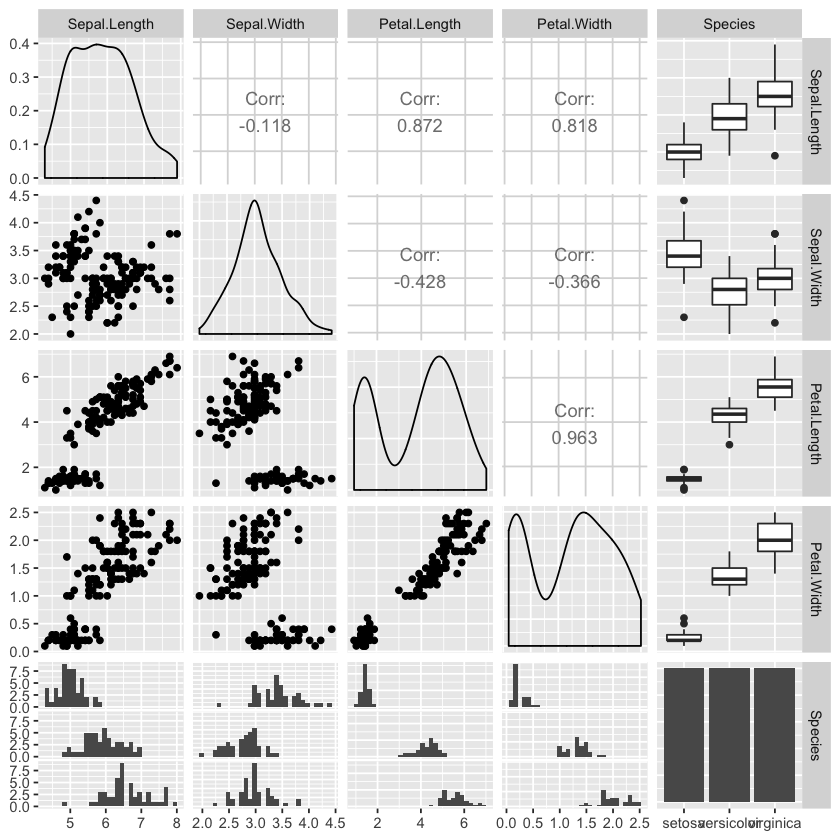

In [25]:
ggpairs(iris)

In [33]:
(r<-cor(iris$Petal.Length, iris$Petal.Width))
#btw thsiis pearson correlation equation

[1] 0.9628654

$$\Large  r=\frac{\sum(x_i - \bar{x})(y_i-\bar{y})}{\sqrt{\sum (x_i -\bar{x})^2}\sqrt{\sum (y_i -\bar{y})^2}}$$

In [34]:
# try pearson, spearman and kendall 
cor.test(iris$Petal.Length, iris$Petal.Width, method = "spearman")

Warning message in cor.test.default(iris$Petal.Length, iris$Petal.Width, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  iris$Petal.Length and iris$Petal.Width
S = 35061, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9376668 


In [35]:
(r<-cor.test(iris$Petal.Length, iris$Petal.Width))
# confidence interval determin the correlation figures within the intervall [0.9490525 , 0.9729853]


	Pearson's product-moment correlation

data:  iris$Petal.Length and iris$Petal.Width
t = 43.387, df = 148, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9490525 0.9729853
sample estimates:
      cor 
0.9628654 


### t-statitics
$$ \huge t=\frac{r}{\sqrt{1-r^2}}\sqrt{n-2}  $$

In [36]:
names(r)

[1] "statistic"   "parameter"   "p.value"     "estimate"    "null.value" 
[6] "alternative" "method"      "data.name"   "conf.int"

In [37]:
r$estimate

cor 
0.9628654

In [38]:
(t_value<-r$estimate*sqrt(148)/sqrt(1-r$estimate^2))
#same as r$statistic

cor 
43.38724

In [40]:
r$conf.int

[1] 0.9490525 0.9729853
attr(,"conf.level")
[1] 0.95

$$ \huge 0.95 \leqslant Correlation Value \leqslant 0.972 $$


In [41]:
r$alternative

[1] "two.sided"

In [62]:
r$p.value

[1] 4.675004e-86

In [44]:
chisq.test(iris$Petal.Length, iris$Petal.Width)
# We have a high Chi-squared value and a P-value of less than. 5% significance level.
# So, we reject the null Hyothesis and conclude that. Petal.Length and Petal.Width have
# a SIGNIFICANT relationship

Warning message in chisq.test(iris$Petal.Length, iris$Petal.Width):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  iris$Petal.Length and iris$Petal.Width
X-squared = 1144.1, df = 882, p-value = 5.143e-09


In [45]:
# we can even have a btter plot for our iris data
install.packages("PerformanceAnalytics")

also installing the dependencies ‘xts’, ‘quadprog’





  There are binary versions available but the source versions are later:
                     binary source needs_compilation
quadprog              1.5-5  1.5-7              TRUE
PerformanceAnalytics  1.5.2  1.5.3              TRUE


The downloaded binary packages are in
	/var/folders/hw/83xf1jxs0b58xft1b6ghk0280000gn/T//RtmpY6bkoz/downloaded_packages


installing the source packages ‘quadprog’, ‘PerformanceAnalytics’


Warning message in install.packages("PerformanceAnalytics"):
“installation of package ‘quadprog’ had non-zero exit status”
Warning message in install.packages("PerformanceAnalytics"):
“installation of package ‘PerformanceAnalytics’ had non-zero exit status”


Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend



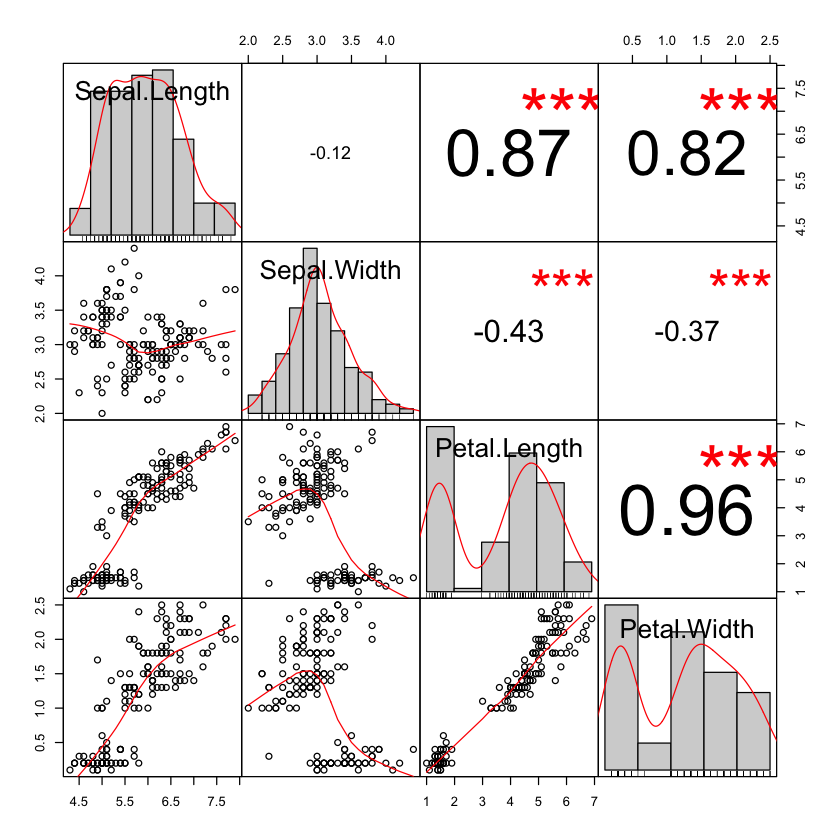

In [37]:
library(PerformanceAnalytics)
chart.Correlation(iris[,-5], histogram=TRUE, pch=19)

- is Petal.Width related to Petal.Length really?
- is the relation between the two variables strong enough to claim they are related?
- Can we use the Data from just 150 Observations to make a claim about all the population of ORchedia?

In [46]:
# حمّل قاعد بيانات زهرة اوركيد

data(iris)

<center><h1> المعادلة الخطية   </h1></center>    

In [47]:
# تحميل مكتبة التخطييات البيناية
library(ggplot2)



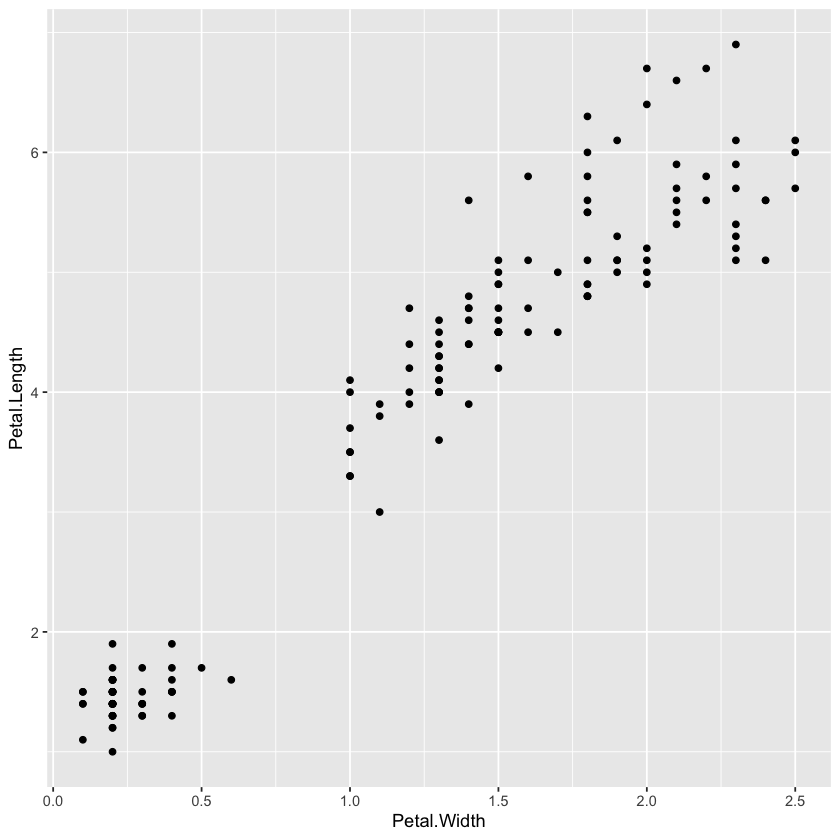

In [48]:
#  Petal.Width, Petal.Length     انجاز تخطيط بياني حول المتغيرين
 
ggplot(iris , aes(Petal.Width, Petal.Length))+
geom_point()


$$ Build the model   \text{بناء النموذج }     $$

In [49]:
attach(iris)

In [50]:
lmModel<- lm(Petal.Length ~  Petal.Width, iris)

In [51]:
# Get a summary report of the model
summary(lmModel)


Call:
lm(formula = Petal.Length ~ Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33542 -0.30347 -0.02955  0.25776  1.39453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.08356    0.07297   14.85   <2e-16 ***
Petal.Width  2.22994    0.05140   43.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4782 on 148 degrees of freedom
Multiple R-squared:  0.9271,	Adjusted R-squared:  0.9266 
F-statistic:  1882 on 1 and 148 DF,  p-value: < 2.2e-16


In [52]:
library(dplyr)
library(broom)


Attaching package: ‘dplyr’


The following object is masked from ‘package:GGally’:

    nasa


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [53]:
names(lmModel)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [54]:
names(lmModel$coefficients)

[1] "(Intercept)" "Petal.Width"

In [55]:
lmModel %>% 
    augment() %>%
head()

Petal.Length,Petal.Width,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.4,0.2,1.529546,0.06451814,-0.12954613,0.01820262,0.4797084,6.929143e-04,-0.27340012
1.4,0.2,1.529546,0.06451814,-0.12954613,0.01820262,0.4797084,6.929143e-04,-0.27340012
1.3,0.2,1.529546,0.06451814,-0.22954613,0.01820262,0.4794490,2.175558e-03,-0.48444472
1.5,0.2,1.529546,0.06451814,-0.02954613,0.01820262,0.4798233,3.604391e-05,-0.06235552
1.4,0.2,1.529546,0.06451814,-0.12954613,0.01820262,0.4797084,6.929143e-04,-0.27340012
1.7,0.4,1.975534,0.05667741,-0.27553423,0.01404722,0.4792834,2.398665e-03,-0.58027343


In [56]:
lmModel_Augmented<- lmModel %>% 
    augment() 

In [57]:
glance(lmModel)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.9271098,0.9266173,0.4782058,1882.452,4.675004e-86,2,-101.1769,208.3539,217.3858,33.84475,148


In [59]:
tidy(lmModel)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.083558,0.07296696,14.84998,4.043318e-31
Petal.Width,2.229940,0.05139623,43.38724,4.675004e-86


In [60]:
var(lmModel_Augmented$`.fitted`)

[1] 2.889132

In [61]:

lmModel %>%
    augment() %>%
    summarise(var_e=var(.resid), var_y=var(Petal.Length)) %>%
    mutate(R_squared=1-var_e/var_y)

var_e,var_y,R_squared
<dbl>,<dbl>,<dbl>
0.227146,3.116278,0.9271098


![](Labs/LinearRegression/R_squared.png)

In [21]:
r$estimate

ERROR: Error in eval(expr, envir, enclos): object 'r' not found


In [18]:
getwd()

[1] "/Users/medamin/Projets/DataScience"

In [27]:
getwd()

[1] "/Users/medamin/Projets/DataScience"


    
![](Labs/LinearRegression/linear-regression.png)
    


In [22]:
qchisq(.95,148)

[1] 177.3897

r$estimate^2

In [23]:
(t_value<- 2.22994 /0.05140)  

[1] 43.38405

It's also known as the residual standard deviation (RSD), and it can be defined as "
## Fstatistics
F-value measures the significance of the OverALL model nad not just one variable. And this has more use when there is more than one explanatory variable.

- for one vriable. we have $$ \large F=t_v^2$$

$$  \large  F=\frac{\frac{R^2}{k-1}}{\frac{1-{R^2}}{n-k}}$$


$$\large F=\frac{Mean Square Model}{Mean Square Error}$$

$$ \large F=\frac{\frac{SSM}{Df_m.Model}}{\frac{SSE}{Df_e.Err}}$$

In [21]:
0.9271/(1-0.9271)*148

[1] 1882.178

In [22]:

43.39^2

[1] 1882.692

In [23]:
anova(lmModel)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Petal.Width,1,430.48065,430.4806468,1882.452,4.675004e-86
Residuals,148,33.84475,0.2286808,NA,NA


In [61]:
(F_Value<-430.4806468/0.2286808)

[1] 1882.452

## Multiple R-Squared:
### Goodness Of Fit
This is percentage of variation in the response variable that is explained by the variation on the explanatory variable.

$$ \large {R^2}=\frac{SSR}{SST}=1-\frac{SSE}{SST}= \frac{ \sum{(\hat{y}-\bar{y})^2}}{\sum{(y_{i}-\bar{y})^2} } $$

![](Labs/LinearRegression/linear-regression.png)

$$\large 0\leqslant{R^2}\leqslant 1$$

$$\large {R^2}=\text{Coefficient Of Determination}$$
$$\large {R^2}=\text{describes proportion of variance in y that is predictable from x}$$
$$\large {R^2}=\text{Y can not be predicted from x}$$
$$\large \text{ Middle values indicate the extent  y is predictable.}$$

$$\large {R^2}=\text{is correlated to Correlation }$$

$$\large \text{For a simple linear regression;}={R^2}={r^2}$$






$$ \large SST=\sum{(y_{i}-\bar{y})^2}$$

$$ \large SSE=\sum{(y_{i}-\hat{y})^2}$$

$$\large  SSR=\sum{(\hat{y}-\bar{y})^2}$$

 


In [43]:
anova(lmModel)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Petal.Width,1,430.48065,430.4806468,1882.452,4.675004e-86
Residuals,148,33.84475,0.2286808,NA,NA


### Adjusted R-Square
$$ \large \bar{R}^2=1- \frac{\frac{SSE}{n-k}}{\frac{SST}{n-1}}$$ 



## Residual Variation

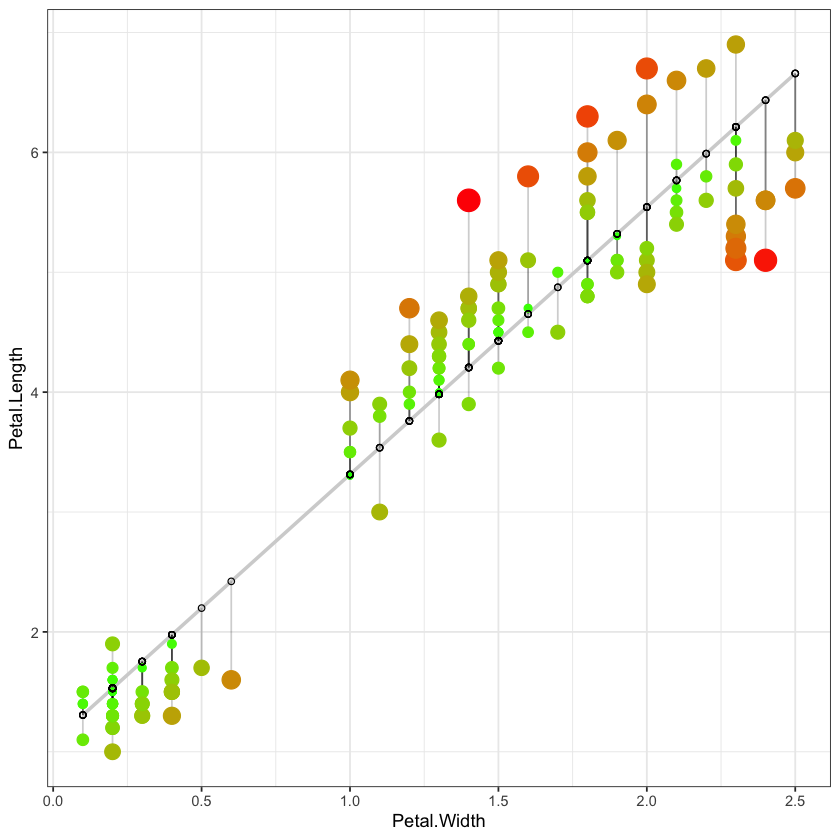

In [30]:

iris$predicted <- predict(lmModel)   # Save the predicted values 
iris$residuals <- residuals(lmModel) # Save the residual values
ggplot(iris, aes(x = Petal.Width, y = Petal.Length)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +     # regression line  
  geom_segment(aes(xend = Petal.Width, yend = predicted), alpha = .2) +      # draw line from point to line
  geom_point(aes(color = abs(residuals), size = abs(residuals))) +  # size of the points
  scale_color_continuous(low = "green", high = "red") +             # colour of the points mapped to residual size - green smaller, red larger
  guides(color = F, size = F) +                             # Size legend removed
  geom_point(aes(y = predicted), shape = 1) +
  theme_bw()

* Rsiduals. 
    - Sum to Zero. 
    - randomly distributed above and below Zero 
    


In [26]:
names(lmModel)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

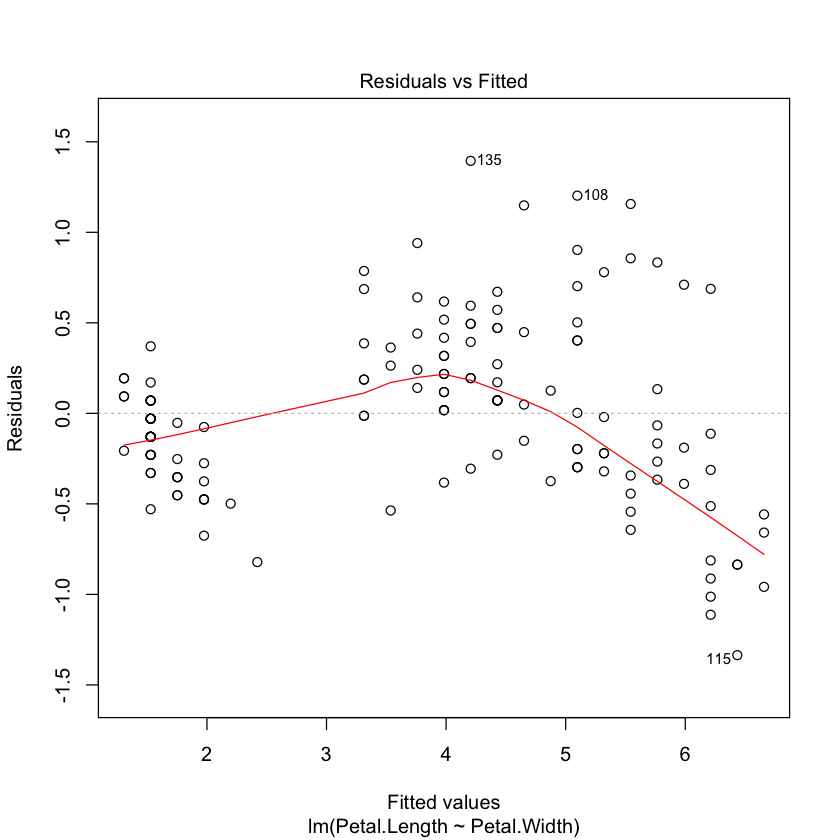

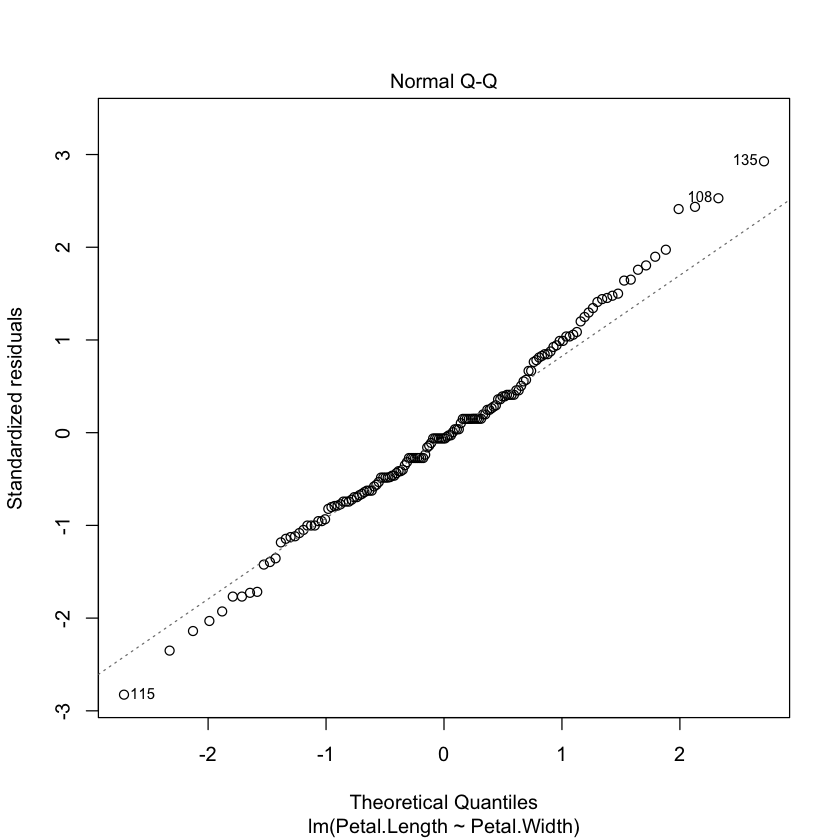

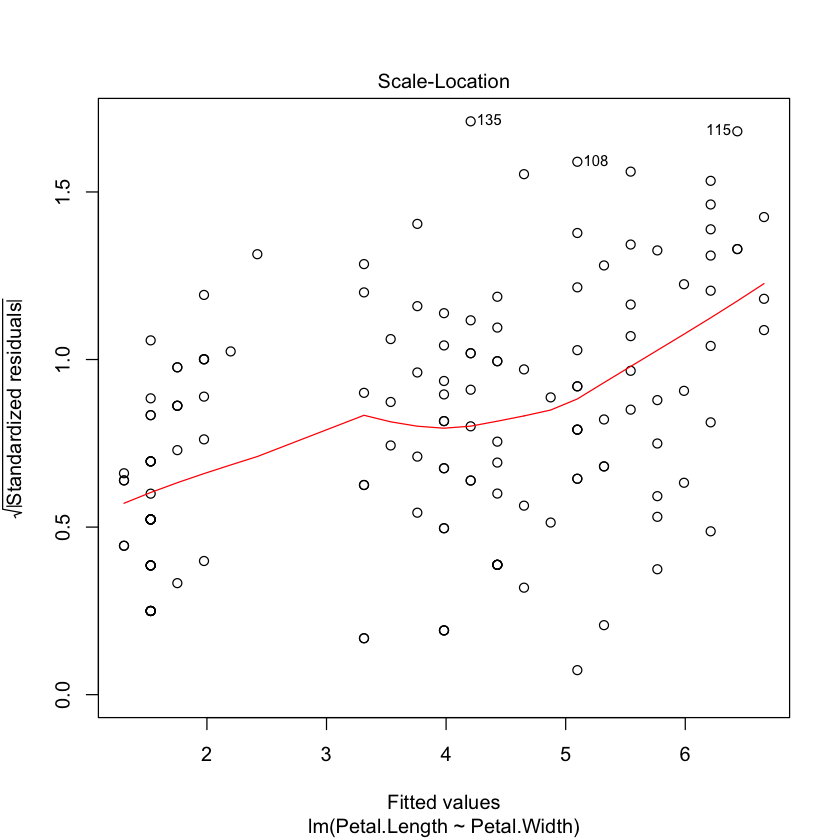

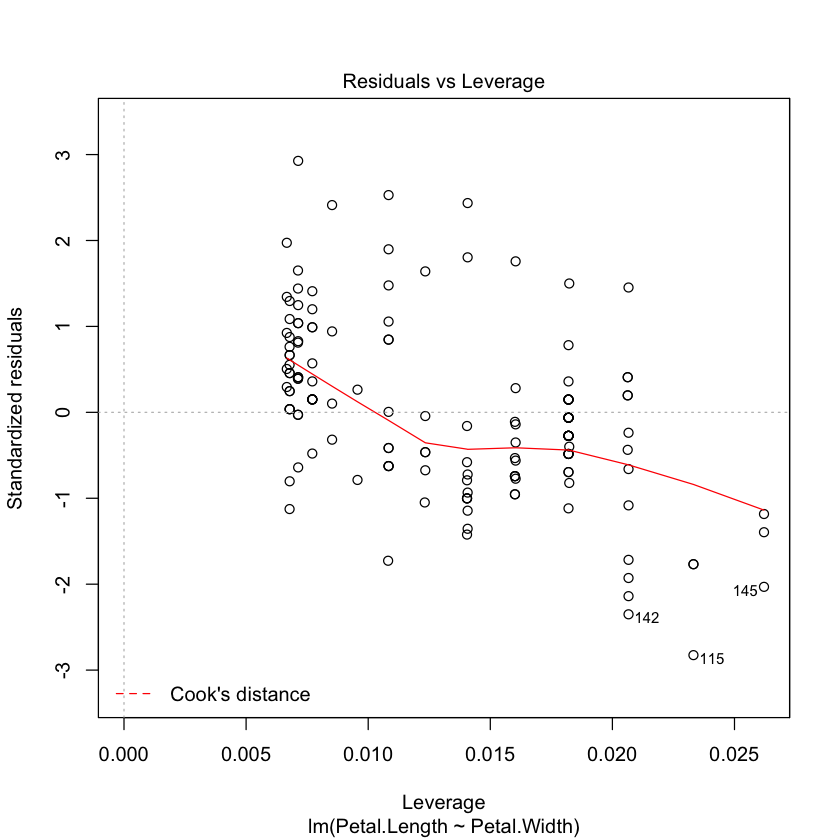

In [57]:
par=(mfrow=c(2,2))
plot(lmModel)

In [32]:
names(lmModel)

ERROR: Error in eval(expr, envir, enclos): object 'lmModel' not found


In [24]:
df <- lmModel %>% augment()
names(df)
head(df)

[1] "Petal.Length" "Petal.Width"  ".fitted"      ".se.fit"      ".resid"      
[6] ".hat"         ".sigma"       ".cooksd"      ".std.resid"

Petal.Length,Petal.Width,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.4,0.2,1.529546,0.06451814,-0.12954613,0.01820262,0.4797084,6.929143e-04,-0.27340012
1.4,0.2,1.529546,0.06451814,-0.12954613,0.01820262,0.4797084,6.929143e-04,-0.27340012
1.3,0.2,1.529546,0.06451814,-0.22954613,0.01820262,0.4794490,2.175558e-03,-0.48444472
1.5,0.2,1.529546,0.06451814,-0.02954613,0.01820262,0.4798233,3.604391e-05,-0.06235552
1.4,0.2,1.529546,0.06451814,-0.12954613,0.01820262,0.4797084,6.929143e-04,-0.27340012
1.7,0.4,1.975534,0.05667741,-0.27553423,0.01404722,0.4792834,2.398665e-03,-0.58027343


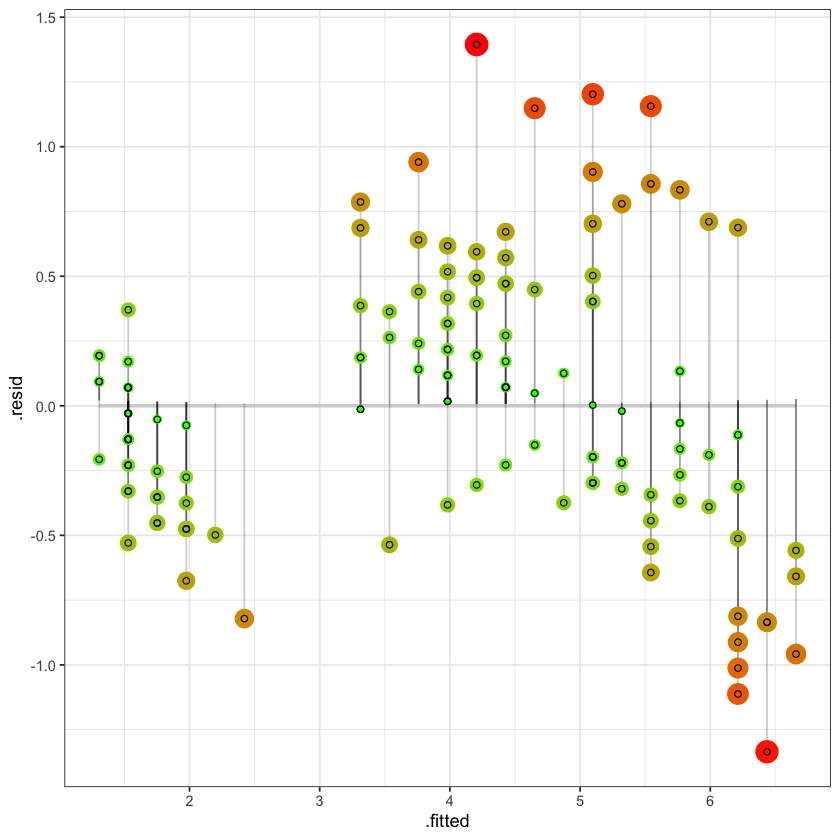

In [27]:
ggplot(df, aes(.fitted, .resid)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +     # regression line  
  geom_segment(aes(yend = .hat, xend = .fitted), alpha = .2) +      # draw line from point to line
  geom_point(aes(color = abs(.resid), size = abs(.resid))) +  # size of the points
  scale_color_continuous(low = "green", high = "red") +             # colour of the points mapped to residual size - green smaller, red larger
  guides(color = F, size = F) +                             # Size legend removed
  geom_point(aes(y = .resid), shape = 1) +
  theme_bw()

In [28]:
anova(lmModel)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Petal.Width,1,430.48065,430.4806468,1882.452,4.675004e-86
Residuals,148,33.84475,0.2286808,NA,NA


In [29]:
summary(lmModel)


Call:
lm(formula = Petal.Length ~ Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33542 -0.30347 -0.02955  0.25776  1.39453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.08356    0.07297   14.85   <2e-16 ***
Petal.Width  2.22994    0.05140   43.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4782 on 148 degrees of freedom
Multiple R-squared:  0.9271,	Adjusted R-squared:  0.9266 
F-statistic:  1882 on 1 and 148 DF,  p-value: < 2.2e-16


In [83]:
# mean Square = Sum_Square/Df
# Residual Standard Error = Sqrt(Mean_Sq)
round(sqrt(0.2286808),4)
# which is exactly What was displayed above at Redisual Standard Error: 0.4782 on 148 degrees of freedom
# Petal length deviate from ht eregression line by approx. 0.4782
(devationRatio<-0.4782/mean(Petal.Length))
# is 12.72% acceptable for our regression line model 

[1] 0.4782

[1] 0.1272485

- Typically we have a regression model looks like this:
𝑌=𝛽0+𝛽1𝑋+𝜖
where 𝜖 is an error term independent of 𝑋

- If 𝛽0 and 𝛽1 are known, we still cannot perfectly predict Y using X due to 𝜖. 
Therefore, we use RSE as a judgement value of the Standard Deviation of 𝜖
- RSE is s just an estimate of the Standard Deviation of 𝜖.  in other term how the prediction or response deviates from the regression line. 

It's also known as the residual standard deviation (RSD), and it can be defined as 
<img src="https://latex.codecogs.com/svg.latex?\Large&space;RSE=\sqrt{\frac{RSS}{n-2}}=\sqrt{\frac{\sum{(y_{i}-\hat{y})}}{n-2}}" /> 


. The smaller the RSE. =>. the model fits the data well

In [84]:
0.4782/mean(Petal.Length)

[1] 0.1272485

In [55]:
#. R_squared =. cor(x, y ) =r  for our simple linear regtession
cor(Petal.Length, Petal.Width)

[1] 0.9628654

<img src="https://latex.codecogs.com/svg.latex?\Large&space;ln(\frac{p}{1-p})=b_{0}+b_{i}x" />

### the model interpretentation
- Petal.Length= 1.08356 + 2.22994 x + e
if Petal.Width increases by 1, Petal.Length will increase by 2.23.  
(is this enough to assess the correlation between the 2 variables)
Of course NO.
- we have to recall that we fount this estimate based on a single sample. What's about the whole population.
( with a single sample, we have to deal with incertainty )


. it's standard to work with 95% confidence intervals, which means  we are 95% certain true values lies wihtin our interval.



![](imgs/confident_interval.png)

In [109]:
# remember the correlation test we have done
cor.test(iris$Petal.Length, iris$Petal.Width)


	Pearson's product-moment correlation

data:  iris$Petal.Length and iris$Petal.Width
t = 43.387, df = 148, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9490525 0.9729853
sample estimates:
      cor 
0.9628654 


- we are 95% confident that my population mean is bigger than 0.95 and less than 0.973

In [24]:
t.test(iris$Petal.Length)
#conf.int. for  the Petal.Length  mean 


	One Sample t-test

data:  iris$Petal.Length
t = 26.073, df = 149, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 3.473185 4.042815
sample estimates:
mean of x 
    3.758 


In [111]:
mean(Petal.Length)

[1] 3.758

In [112]:
qt(.95, df=148)*sd(Petal.Length)/sqrt(150)

[1] 0.238576

In [113]:

mean(Petal.Length) - qt(.95, df=148)*sd(Petal.Length)/sqrt(150)

[1] 3.519424

In [21]:
step(lmModel)

Start:  AIC=-219.33
Petal.Length ~ Petal.Width

              Df Sum of Sq    RSS     AIC
<none>                      33.84 -219.33
- Petal.Width  1    430.48 464.33  171.49



Call:
lm(formula = Petal.Length ~ Petal.Width, data = iris)

Coefficients:
(Intercept)  Petal.Width  
      1.084        2.230  


In [19]:
attach(iris)
mean(Petal.Width) + qt(0.95, df=148)*sd(Petal.Width)/sqrt(150)

The following objects are masked from iris (pos = 3):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species



[1] 1.302348

In [115]:
attach(iris)

The following objects are masked from iris (pos = 3):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species



In [116]:
qt(.95, df=148)

[1] 1.655215

###  how to access. the model parameters. 


In [118]:
anova(lmModel)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Petal.Width,1,430.48065,430.4806468,1882.452,4.675004e-86
Residuals,148,33.84475,0.2286808,NA,NA


![](imgs/residualVar.png)
- Coefficient = 2.23 and the Std Error =0.051. This tell us about  typpical variation of this coefficient.The Std Error gives kind of average Expected Error term from this particular sample value.  
(t statistice )Error_t= Estimate / Std_Error 
* The higher the t-statistic the more  significant the variable is. HIgher in magnitude 
Petal.Width -> t1= 2.2299/0.05514



### P-Value
P-value< 5%
P-value gives us an indication how extreme this coefficient if the Petal.Width coefficient equals to Zero. 
Here we've to Evoque The Null hypothesis where linear regression's coefficient are Zeros. We start at the hypothesis that there is no  effect of Petal.width coeficient on the Petal.Length prediction model. 
briefly, P-value gives the probability of this coefficient occuring just due to random chance. In other term, it tells  if the Petal.Width coefficient has no effect  ont the Target variable Petal.Length.


At 5% we test wether this variable is significant or not. 
there’s minimal chance that this predictor is not meaningful for the regression.

### F statistic
The F-statistic is equal to 430.48/0.229 = 1882.452.  The distribution is F(1, 148),
and the probability of observing a value greater than or equal to 1882.452
is less than 0.001.  There is strong evidence that \beta_1 is not equal to zero.       


The r² term is equal to 0.577, indicating that 57.7% of the variability
in the response is explained by the explanatory variable.


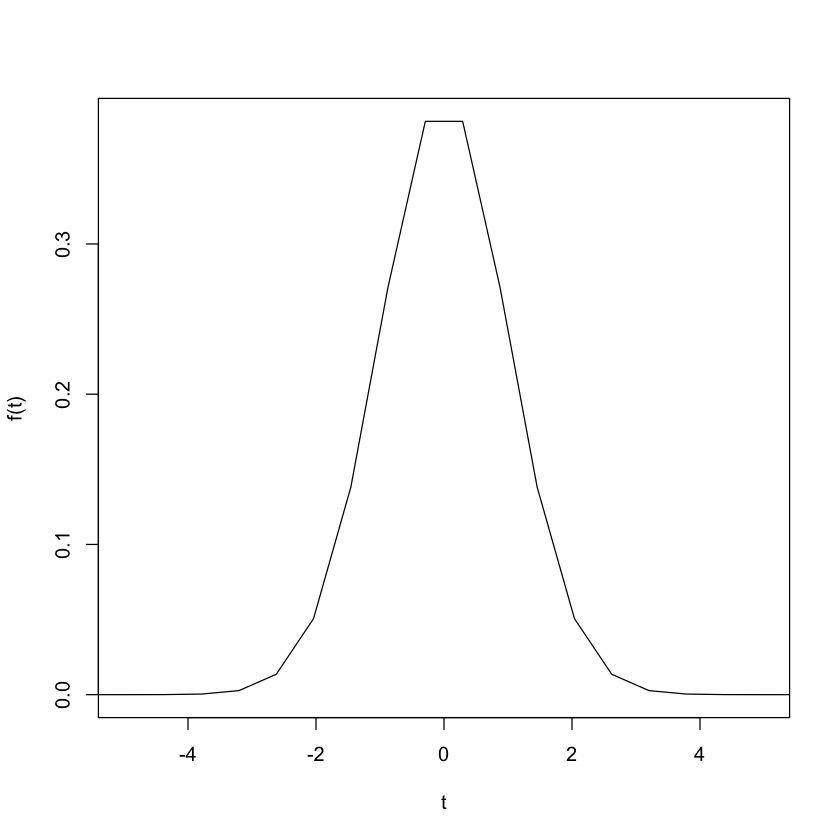

In [119]:
t.value=seq(-43.39, 43.39, length=nrow(iris))
plot(x=t.value, y=dt(t.value, 148), type="l", xlim = c(-5, 5), xlab = "t", ylab="f(t)")

In [121]:
confint(lmModel)

,2.5 %,97.5 %
(Intercept),0.9393664,1.227750
Petal.Width,2.1283752,2.331506


In [192]:
# R^2 = 1- (Residual sum of squares)/(Total sum of squares)
1- 33.84475/430.48065
summary(lmModel)

[1] 0.9213792


Call:
lm(formula = Petal.Length ~ Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33542 -0.30347 -0.02955  0.25776  1.39453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.08356    0.07297   14.85   <2e-16 ***
Petal.Width  2.22994    0.05140   43.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4782 on 148 degrees of freedom
Multiple R-squared:  0.9271,	Adjusted R-squared:  0.9266 
F-statistic:  1882 on 1 and 148 DF,  p-value: < 2.2e-16


In [122]:
anova(lmModel)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Petal.Width,1,430.48065,430.4806468,1882.452,4.675004e-86
Residuals,148,33.84475,0.2286808,NA,NA


In [67]:
t.test(iris$Sepal.Length, iris$Petal.Length)


	Welch Two Sample t-test

data:  iris$Sepal.Length and iris$Petal.Length
t = 13.098, df = 211.54, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.771500 2.399166
sample estimates:
mean of x mean of y 
 5.843333  3.758000 


In [4]:
2.22994   + 0.05140

[1] 2.28134

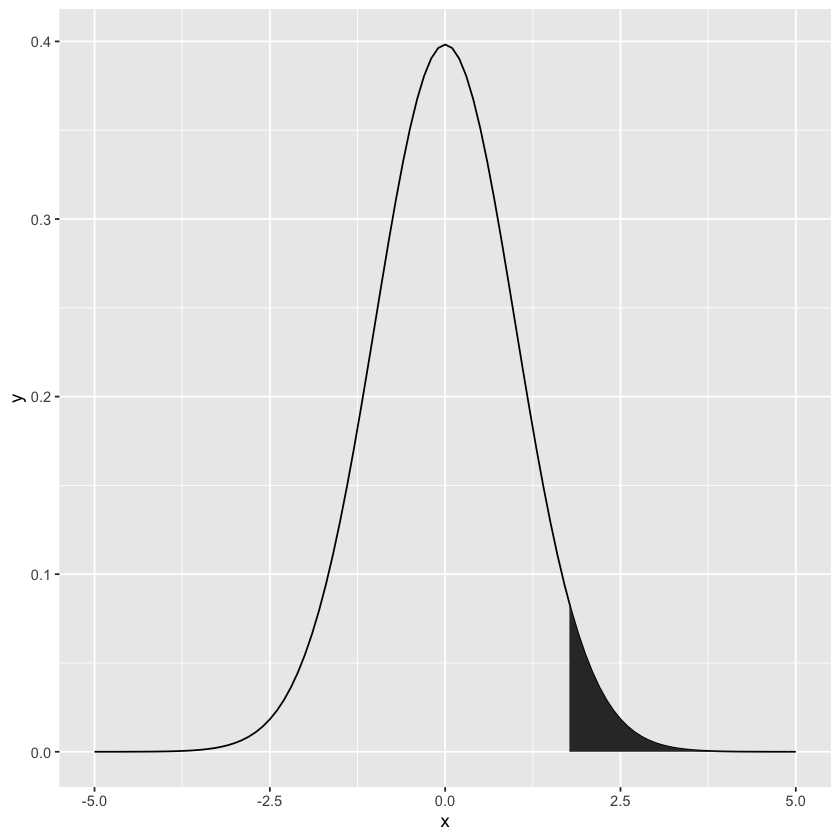

In [66]:
ggplot(data.frame(x = c(14.85, 43.39)), aes(x)) +
  stat_function(fun = dt, args =list(df =148)) +
  stat_function(fun = dt,   args =list(df =148),xlim = c(1.771500 ,5), geom = "area") +
xlim(-5,5)

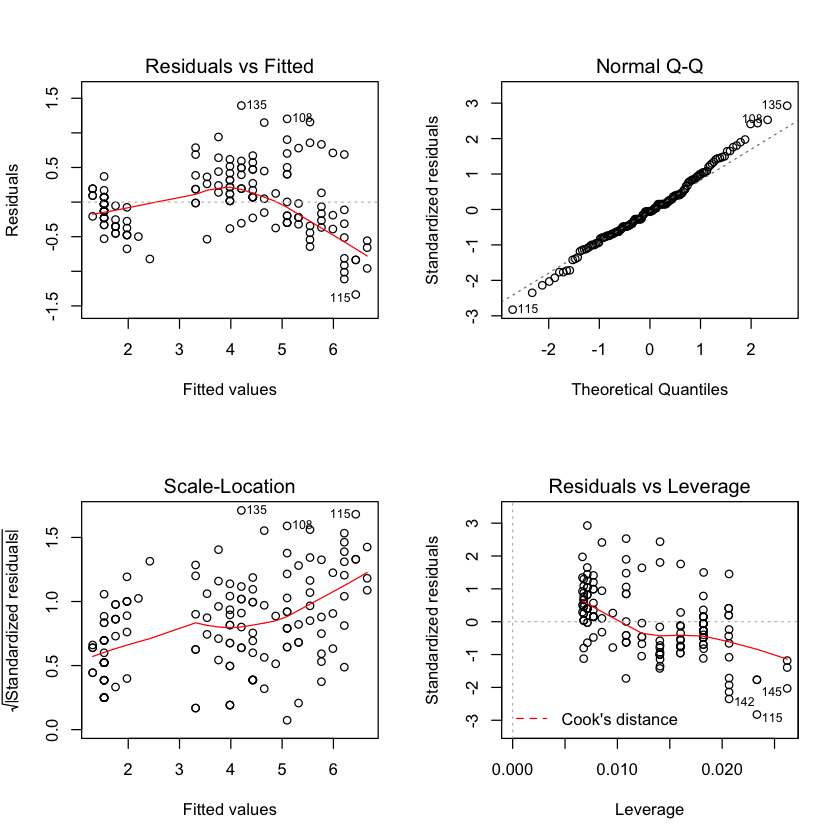

In [227]:
par(mfrow=c(2,2)) # Plot in a layout with 2 rows and 2 columns
plot(lmModel)

In [124]:
length(Residual)

ERROR: Error in eval(expr, envir, enclos): object 'Residual' not found


In [127]:
# residual =  Petal.Length - Predicted_Petal.Length
iris$Residual <- Petal.Length- predict(model)

In [128]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Residual
5.1,3.5,1.4,0.2,setosa,-0.12954613
4.9,3.0,1.4,0.2,setosa,-0.12954613
4.7,3.2,1.3,0.2,setosa,-0.22954613
4.6,3.1,1.5,0.2,setosa,-0.02954613
5.0,3.6,1.4,0.2,setosa,-0.12954613
5.4,3.9,1.7,0.4,setosa,-0.27553423


In [131]:
(sem<- sd(iris$Residual)/sqrt(length(iris$Residual)))

[1] 0.03891409

In [133]:
c(mean(iris$Residual)-2*sem, mean(iris$Residual)+2*sem)

[1] -0.07782819  0.07782819

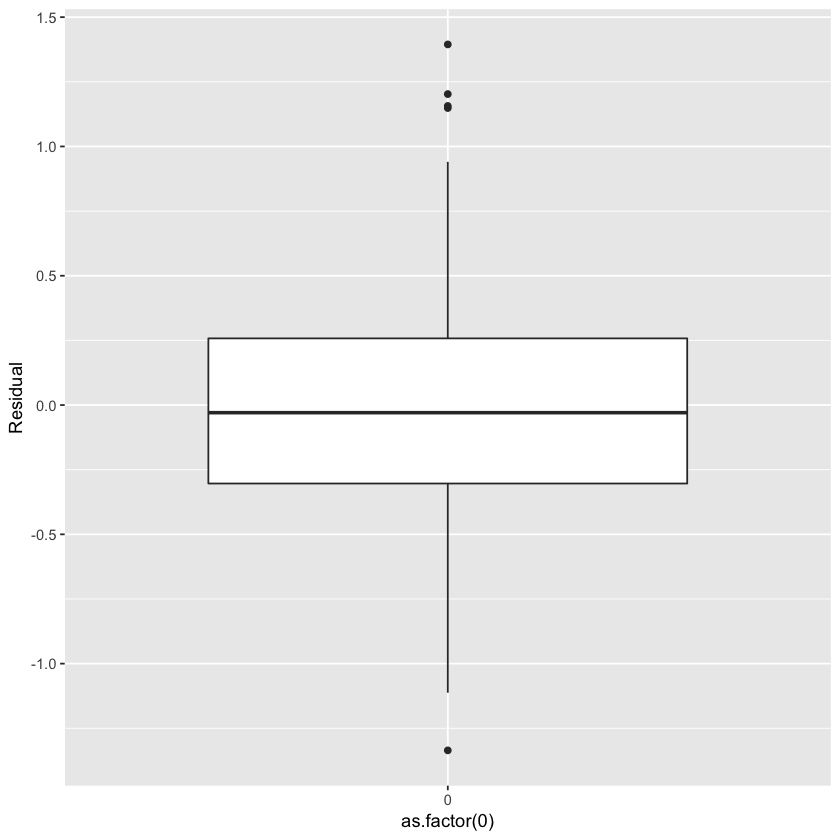

In [134]:
ggplot(iris)+
geom_boxplot( aes(as.factor(0), Residual))

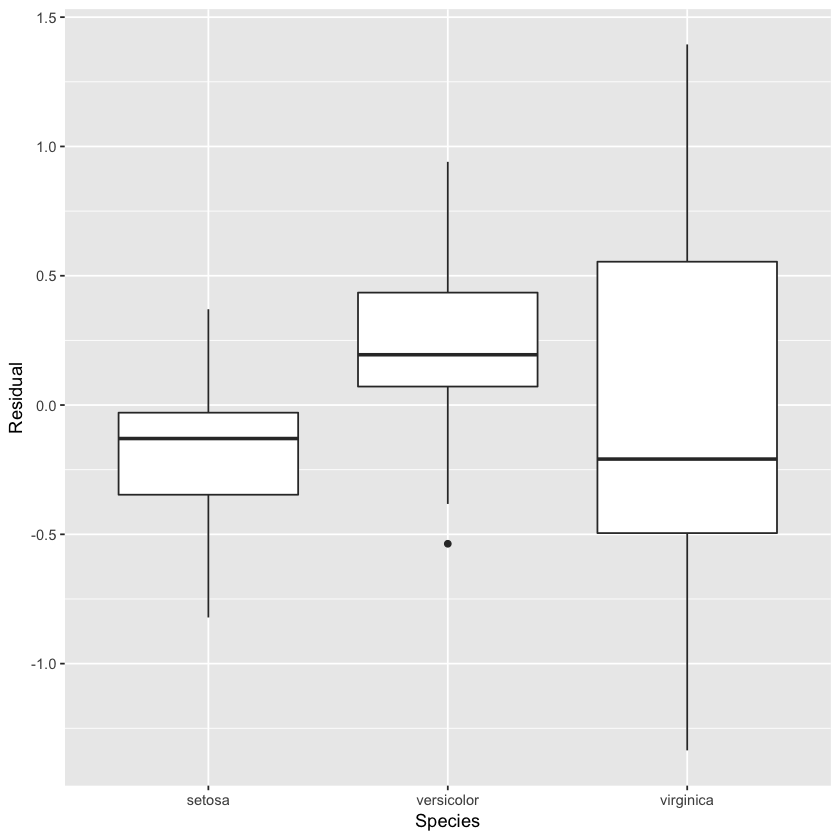

In [135]:
ggplot(iris)+
geom_boxplot(aes(Species, Residual))

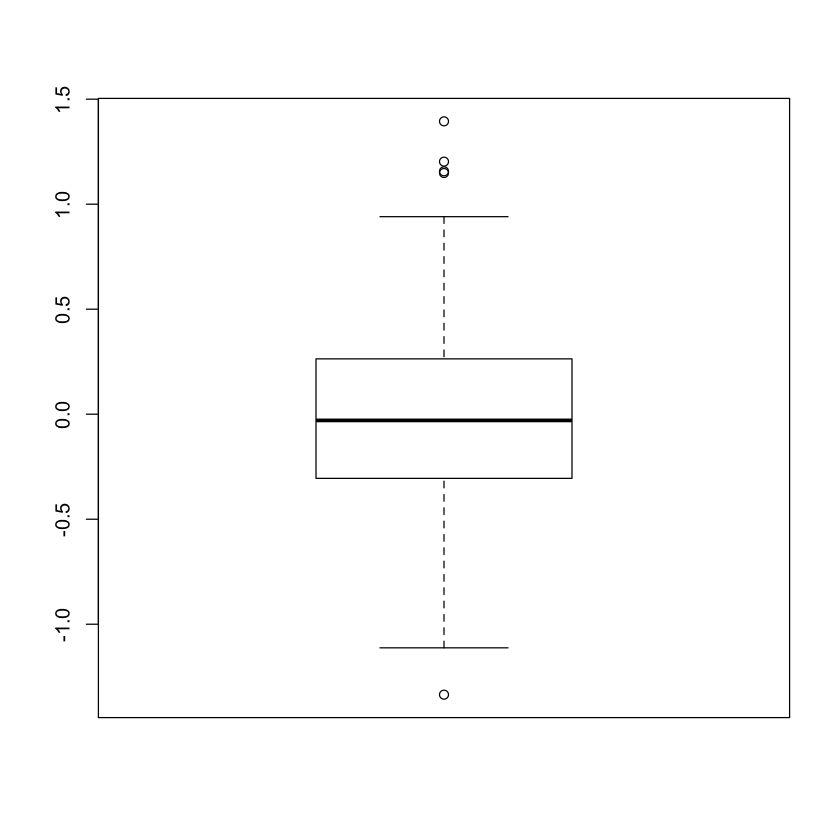

In [136]:
boxplot(iris$Residual)

![](imgs/residual.summary.png)

In [137]:
summary(iris$Residual)
# same as the one we had above 
# Since the median deviance residual is close to zero, this means that our model is not biased in one direction 
#(i.e. the out come is neither over- nor underestimated).

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.33542 -0.30347 -0.02955  0.00000  0.25776  1.39453 

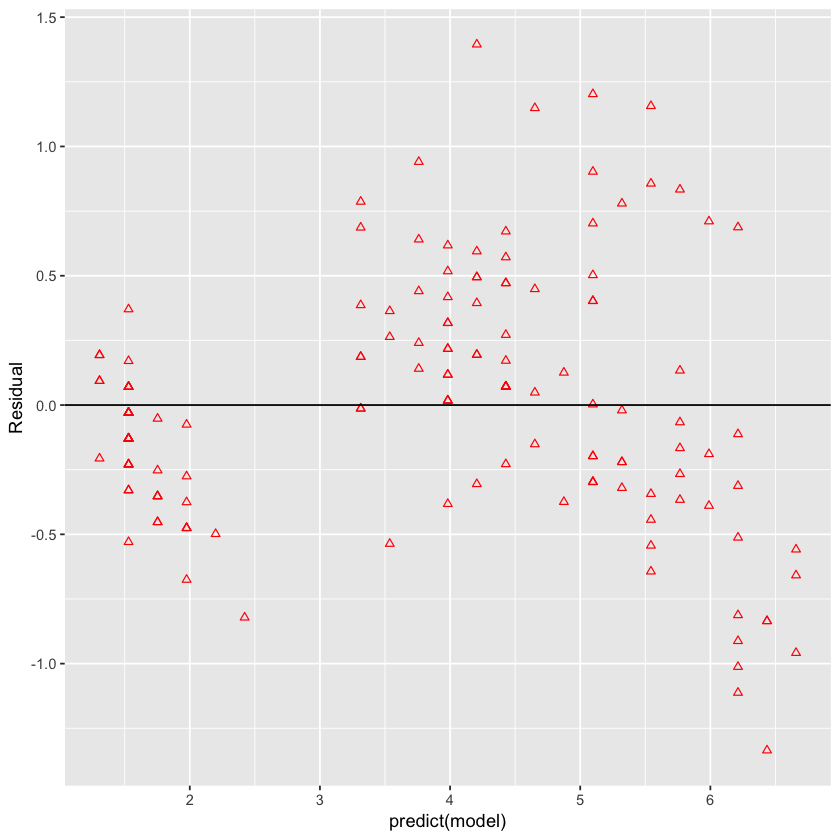

In [138]:
# Lets plot these predicted values vs the residuals.
ggplot(iris)+
geom_point( aes( predict(model) , Residual), col="red", pch=2) +
geom_hline(yintercept=0)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


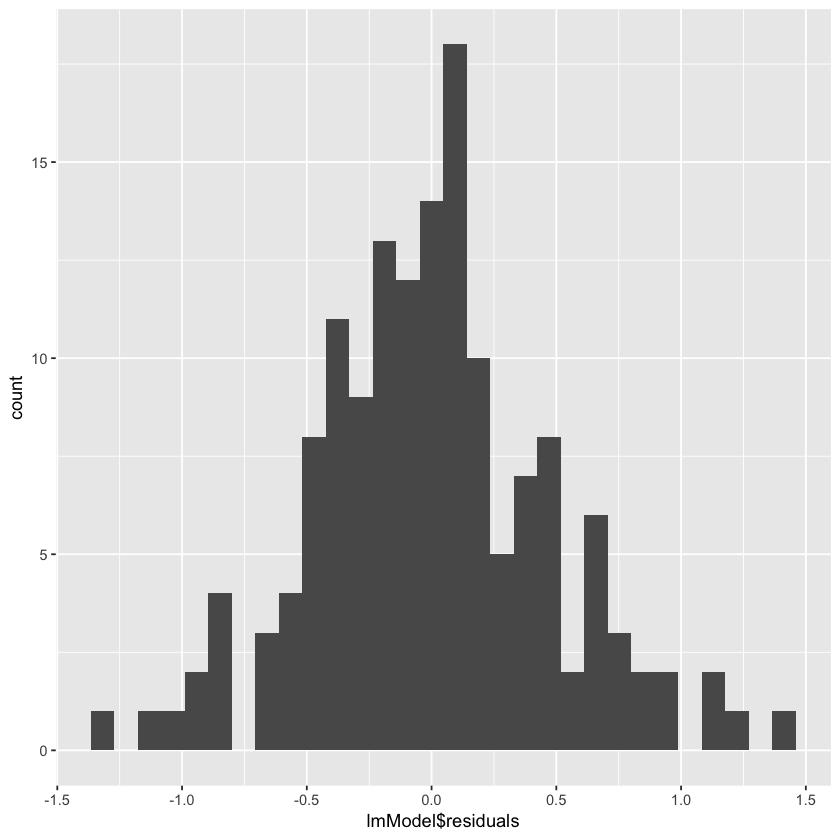

In [49]:
ggplot() +
geom_histogram(aes(lmModel$residuals))

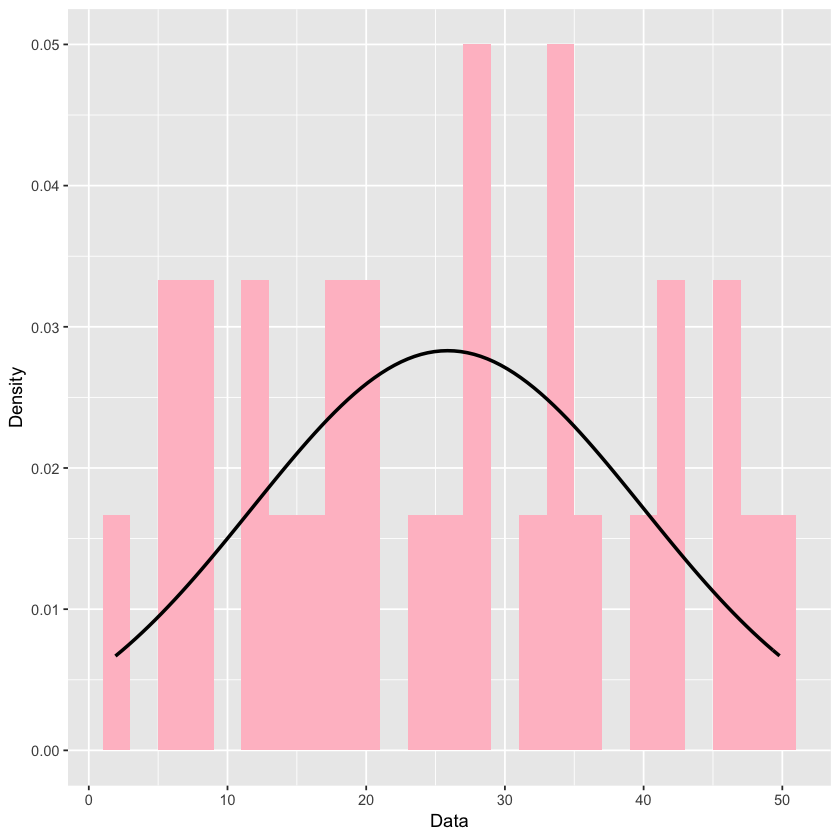

In [145]:
# exemple de multiple plot on the same graph
data <- data.frame(c(runif(30,1,50)))
ggplot(data, aes(data[,1])) +
    geom_histogram(aes(y = ..density..), binwidth = 2, fill = 'pink') +
    labs(x = 'Data', y = 'Density') +
    stat_function(fun = dnorm, 
        args = list(mean = mean(data[,1], na.rm = TRUE), 
                    sd = sd(data[,1], na.rm = TRUE)), 
        colour = 'black', size = 1) 

In [152]:
names(data)<- "v"

In [156]:
sd(data$v)

[1] 14.09304

In [157]:
mean(data$v)

[1] 25.87326

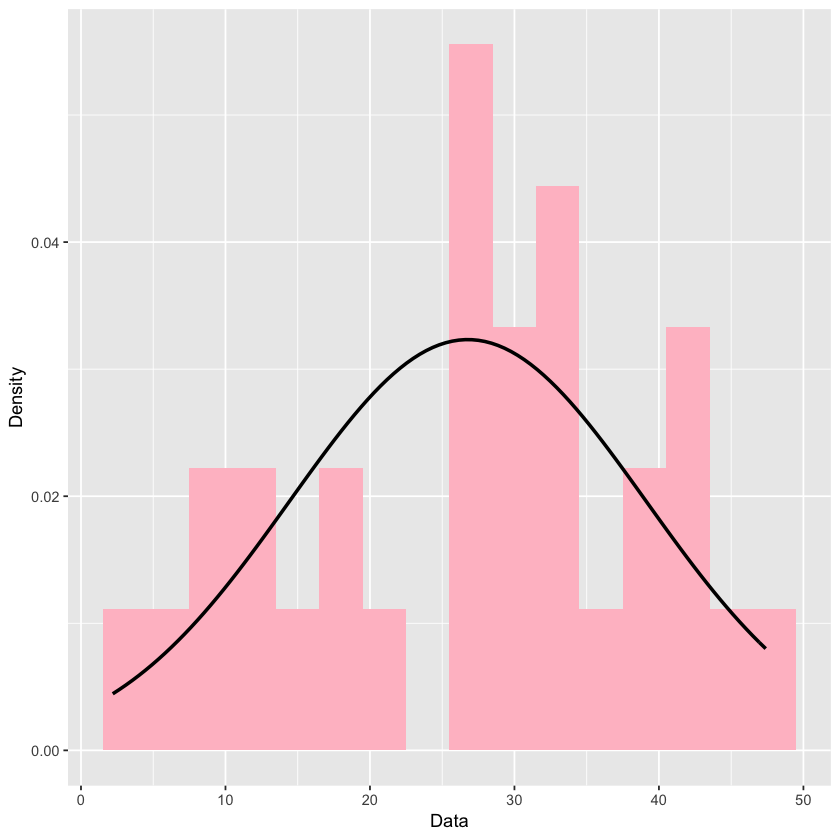

In [166]:
data <- data.frame(c(runif(30,1,50)))
ggplot(data, aes(data[,1])) +
    geom_histogram(aes(y = ..density..), binwidth = 3, fill = 'pink') +
    labs(x = 'Data', y = 'Density') +
    stat_function(fun = dnorm, 
        args = list(mean = mean(data[,1], na.rm = TRUE), 
                    sd = sd(data[,1], na.rm = TRUE)), 
        colour = 'black', size = 1) 

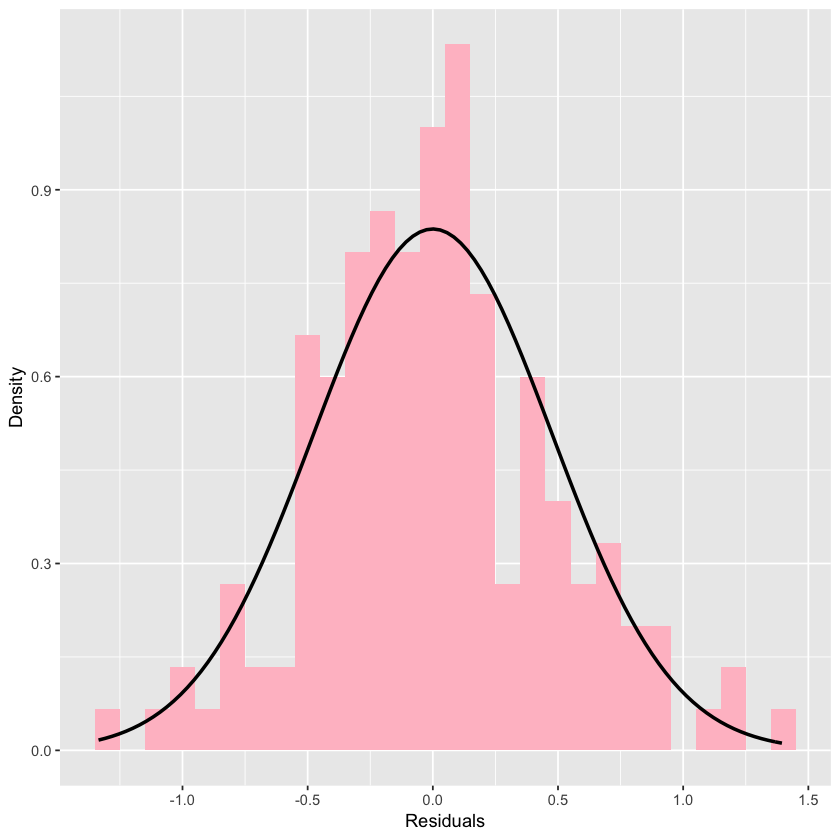

In [52]:
ggplot(lmModel, aes(lmModel$residuals)) +
geom_histogram(aes(y=..density..), fill="pink", binwidth = .1)+
stat_function(fun = dnorm, 
        args = list(mean = mean(lmModel$residuals), 
                    sd = sd(lmModel$residuals)), 
        colour = 'black', size = 1) +
 labs(x = 'Residuals', y = 'Density') 

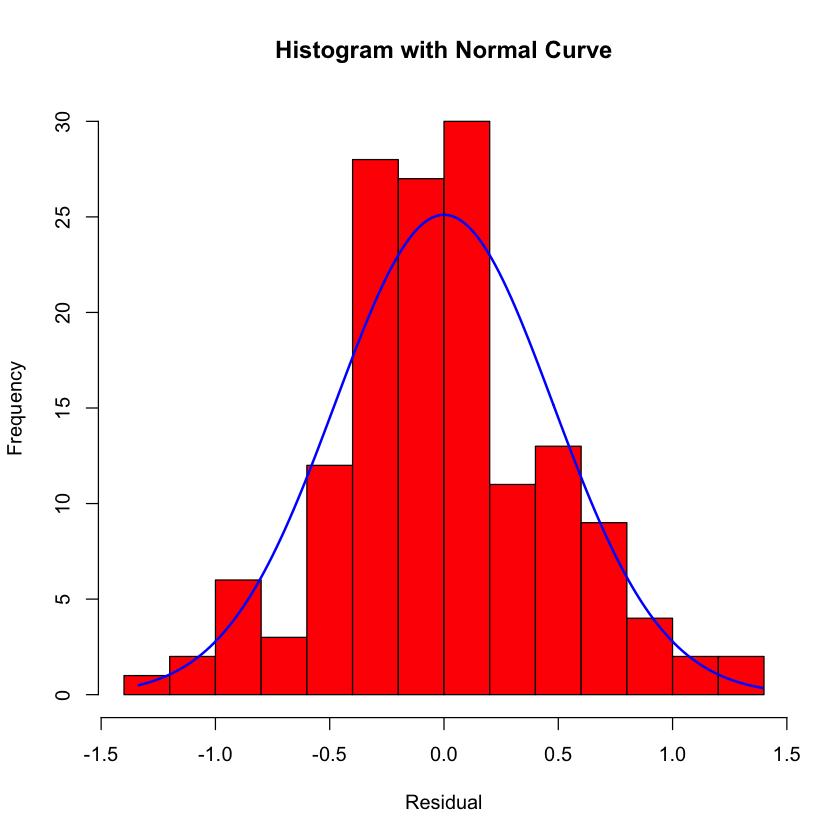

In [173]:

x <- iris$Residual
h<-hist(x, breaks=10, col="red", xlab="Residual", main="Histogram with Normal Curve") 
xfit<-seq(min(x),max(x),length=150)
#dnorm->density of normal dist
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x)) 
#mids ->the n cell midpoints.
yfit <- yfit*diff(h$mids[1:2])*length(x) 
lines(xfit, yfit, col="blue", lwd=2)

In [298]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

### How to interpret Residuals?
- Residuals follow roughtly normal distribution. We can do so by checking histogram od residuals. If the histogram of residuals looks normal then we have a valid model.

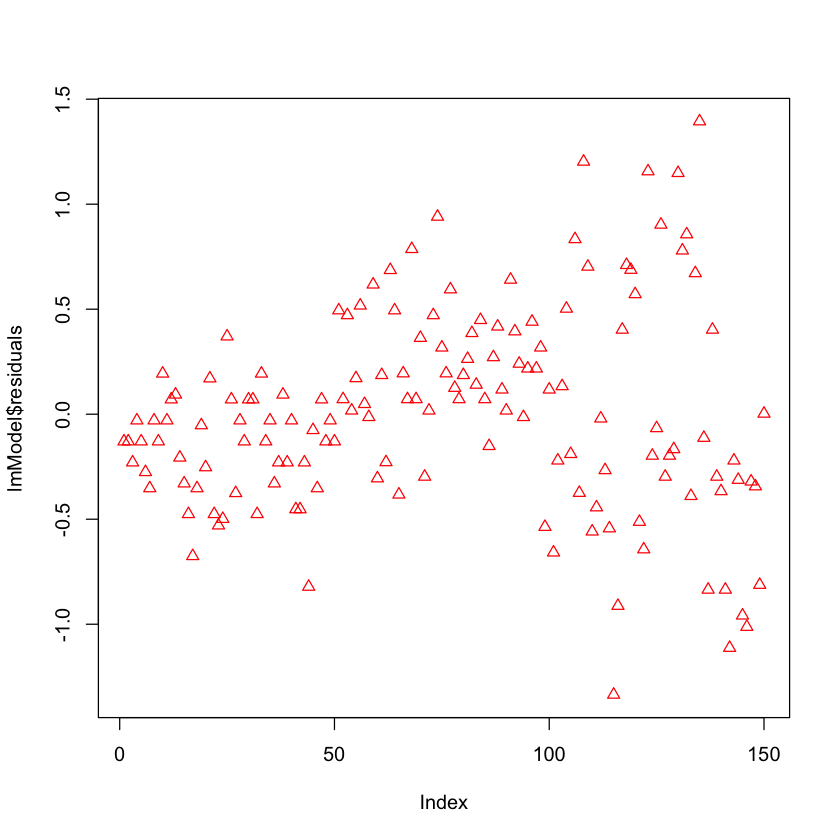

In [16]:
#  Simplest way to do previous. Process


plot(lmModel$residuals, col="red", pch=2)


-  A very important point is that we need to check is that our residuals follow roughly normal distribution. We can do so by checking histogram of residuals. If the histogram of residuals looks normal then we have a valid model.

### How to interpret Patterns in Residual Plots ?

![](imgs/residuals.png)

#### Residual Plot ( a )

- Residuals are randomly distributed around regression line
- Residuals follow normal distribution
- Residuals are Homoscedastic.
- Linear model is valid.

#### Residual Plot ( b )

- Residuals are non randomly distributed around regression line
- Residuals increase as the predicted value increases, which could mean that we might be missing a variable or - two and some predictive pattern is being leaked as a residual.
- Residuals are Homoscedastic.
- Linear model is not valid ( if it has intercept ), check for explanatory variables which might explain the linear residual or the model has failed to account for intercept
- Or the plot does not belong to a linear model at all another option is that the model might be a model forced to pass through origin i.e a non intercept model

#### Residual Plot ( c )

- Residuals are non randomly distributed around regression line
- Residuals are Homoscedastic
- Residuals have curve pattern to them.
 -Linear model is not valid. Curved residual pattern might mean that we may have to fit a polynomial of some order to explain the curved pattern of residuals.


## visualize The Model

In [75]:
coef(model)

(Intercept) Petal.Width 
   1.083558    2.229940

In [115]:
ggplot( iris, aes( Petal.Width, Petal.Length))+
geom_point()+
geom_abline(intercept = model$coefficients[1], slope=model$coefficients[2], color="red", lwd=2)

ERROR: Error in geom_abline(intercept = model$coefficients[1], slope = model$coefficients[2], : object 'model' not found


In [114]:
eq = paste("y = ", round(model$coefficients[2], 2), "*x ", round(model$coefficients[1], 2))
           
ggplot( iris, aes( Petal.Width, Petal.Length))+
geom_point()+
geom_abline(intercept = model$coefficients[1], slope=model$coefficients[2], color="red", lwd=2)+
geom_hline(yintercept = mean(Petal.Length)) +
ggtitle( " LInear Regression ", subtitle = eq)

ERROR: Error in paste("y = ", round(model$coefficients[2], 2), "*x ", round(model$coefficients[1], : object 'model' not found


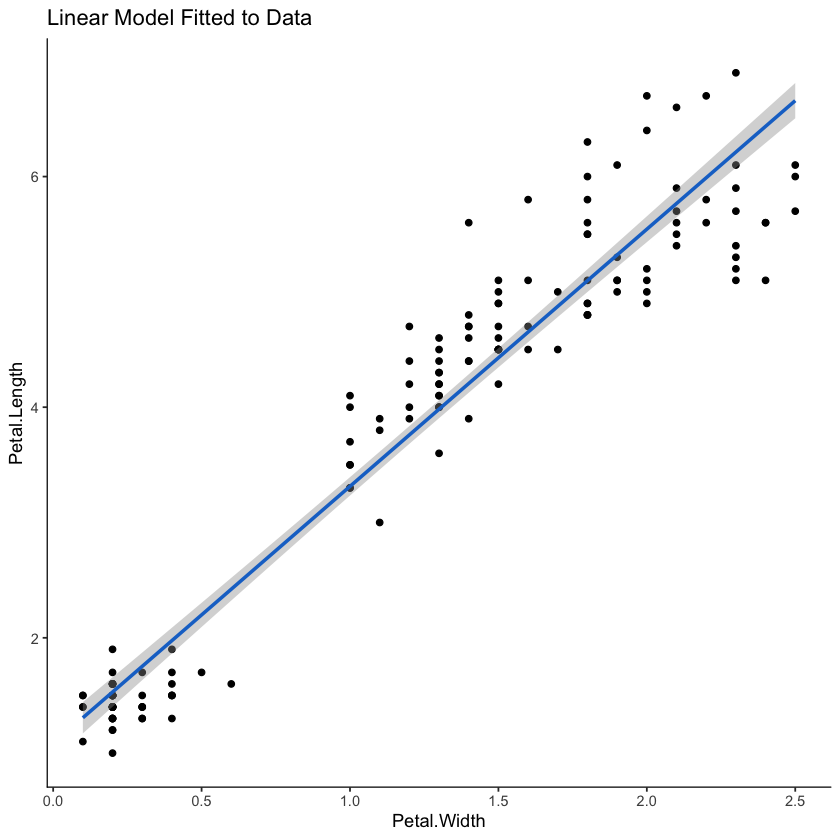

In [112]:
ggplot(iris, aes(Petal.Width,Petal.Length)) +
geom_point() +
stat_smooth(method = "lm", col = "dodgerblue3") +
theme(panel.background = element_rect(fill = "white"),
axis.line.x=element_line(),
axis.line.y=element_line()) +
ggtitle("Linear Model Fitted to Data")

- The gray shading around the line represents a confidence interval of 0.95, the default for the stat_smooth() function, which smoothes data to make patterns easier to visualize. This 0.95 confidence interval is the probability that the true linear model for the girth and volume of all black cherry trees will lie within the confidence interval of the regression model fitted to our data. Even though this model fits our data quite well, there is still variability within our observations.

### Another alternative   for Sepal Length & Width

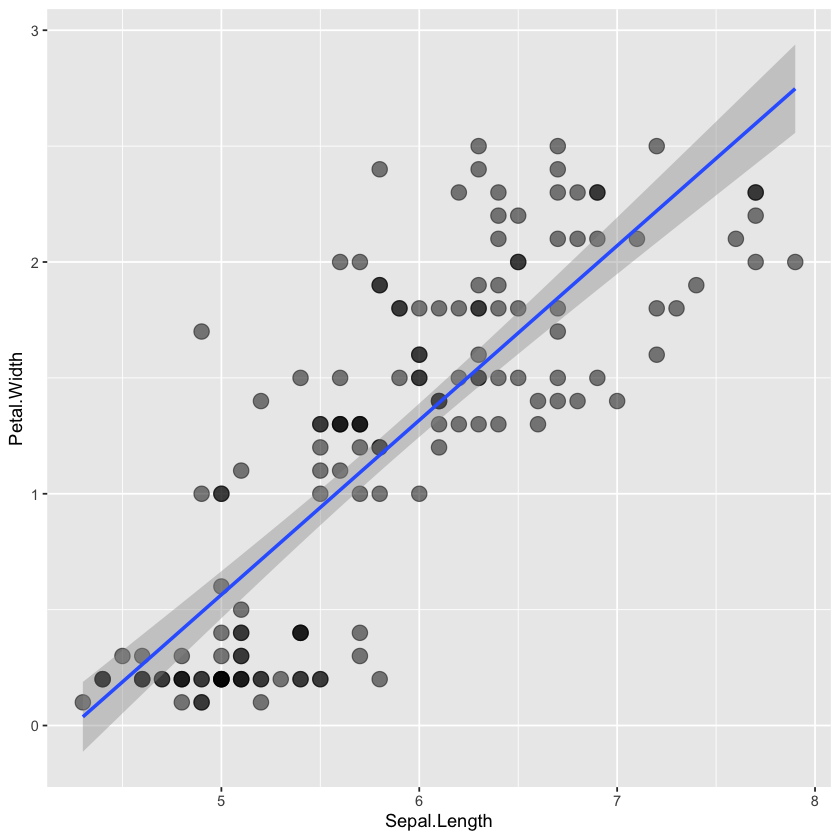

In [105]:

ggplot(iris, aes(Sepal.Length, Petal.Width))+
  geom_point(size = 4,
             alpha = 0.5)+
  geom_smooth(method = "lm")

- here we can either test the _**model**_ with a new dataframe using coeficients' model or throught the **predict** instruction

In [106]:

newDf<- c(1.5, 3.4, 5)
lmModel$coef[1] +lmModel$coef[2]*newDf
predict(lmModel, data.frame(Petal.Width=newDf))

[1]  4.428469  8.665356 12.233261

1         2         3 
 4.428469  8.665356 12.233261

In [107]:
library(broom)

In [108]:
lmModel %>%
    augment() %>% head()

Petal.Length,Petal.Width,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.4,0.2,1.529546,0.06451814,-0.12954613,0.01820262,0.4797084,6.929143e-04,-0.27340012
1.4,0.2,1.529546,0.06451814,-0.12954613,0.01820262,0.4797084,6.929143e-04,-0.27340012
1.3,0.2,1.529546,0.06451814,-0.22954613,0.01820262,0.4794490,2.175558e-03,-0.48444472
1.5,0.2,1.529546,0.06451814,-0.02954613,0.01820262,0.4798233,3.604391e-05,-0.06235552
1.4,0.2,1.529546,0.06451814,-0.12954613,0.01820262,0.4797084,6.929143e-04,-0.27340012
1.7,0.4,1.975534,0.05667741,-0.27553423,0.01404722,0.4792834,2.398665e-03,-0.58027343


In [109]:
head(predict(lmModel))

1        2        3        4        5        6 
1.529546 1.529546 1.529546 1.529546 1.529546 1.975534

In [110]:
sum(lmModel$residuals)

[1] -2.94556e-15

In [111]:
lmModel %>%
    augment() %>% 
    summarise(Sum=sum(.resid))

Sum
<dbl>
-2.94556e-15


##  Residuals

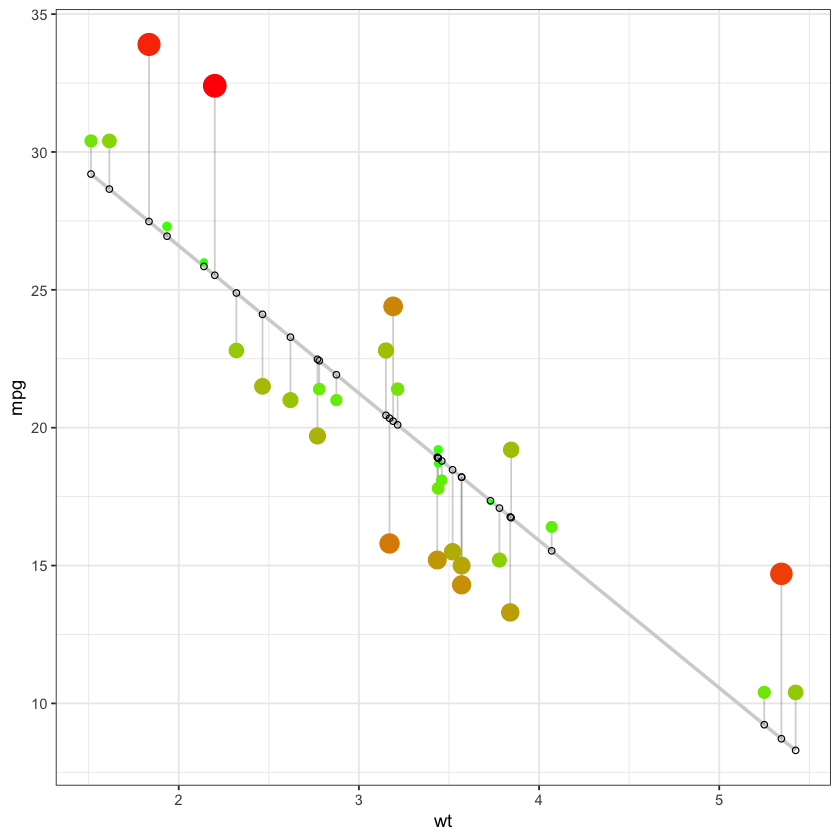

In [75]:
cars <- mtcars
lmCarModel <- lm(mpg ~ wt, data = cars) # fit the model
cars$predicted <- predict(lmCarModel)   # Save the predicted values
cars$residuals <- residuals(lmCarModel) # Save the residual values
ggplot(cars, aes(x = wt, y = mpg)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +     # regression line  
  geom_segment(aes(xend = wt, yend = predicted), alpha = .2) +      # draw line from point to line
  geom_point(aes(color = abs(residuals), size = abs(residuals))) +  # size of the points
  scale_color_continuous(low = "green", high = "red") +             # colour of the points mapped to residual size - green smaller, red larger
  guides(color = FALSE, size = FALSE) +                             # Size legend removed
  geom_point(aes(y = predicted), shape = 1) +
  theme_bw()

In [76]:
summary(lmCarModel)


Call:
lm(formula = mpg ~ wt, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


In [77]:
names(lmCarModel)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

Don't know how to automatically pick scale for object of type function. Defaulting to continuous.
ERROR while rich displaying an object: All columns in a tibble must be 1d or 2d objects:
* Column `y` is function
Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(exp

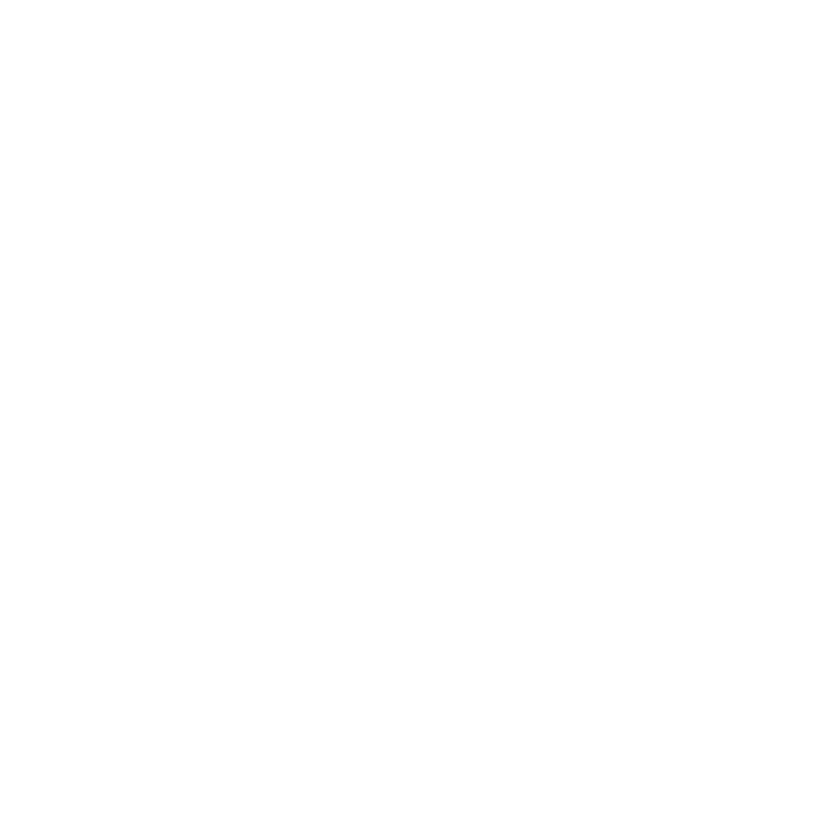

In [78]:
library(dplyr); library(broom); library(ggplot2)


    ggplot(lmCarModel) +
    geom_point(aes( predict(lmCarModel), residuals))

In [79]:
library(dplyr); library(broom)
lmCarModel %>% augment() %>% select(mpg, .fitted, .resid) %>% head()

mpg,.fitted,.resid
21.0,23.28261,-2.2826106
21.0,21.91977,-0.9197704
22.8,24.88595,-2.0859521
21.4,20.10265,1.2973499
18.7,18.90014,-0.2001440
18.1,18.79325,-0.6932545


In [86]:
head(residuals(lmCarModel));  head(predict(lmCarModel))

Mazda RX4     Mazda RX4 Wag        Datsun 710    Hornet 4 Drive 
       -2.2826106        -0.9197704        -2.0859521         1.2973499 
Hornet Sportabout           Valiant 
       -0.2001440        -0.6932545

Mazda RX4     Mazda RX4 Wag        Datsun 710    Hornet 4 Drive 
         23.28261          21.91977          24.88595          20.10265 
Hornet Sportabout           Valiant 
         18.90014          18.79325

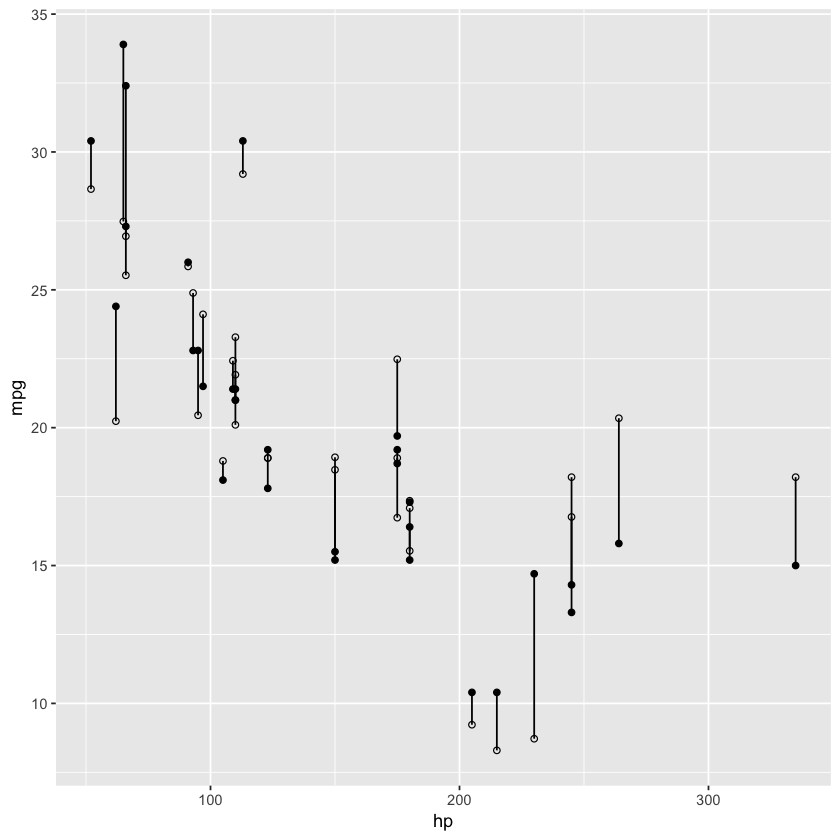

In [88]:
df<- lmCarModel %>% augment()
ggplot(mtcars, aes(x = hp, y = mpg)) +
  geom_segment(aes(xend = hp, yend = df$.fitted)) +
  geom_point() +
  geom_point(aes(y = df$.fitted), shape = 1)

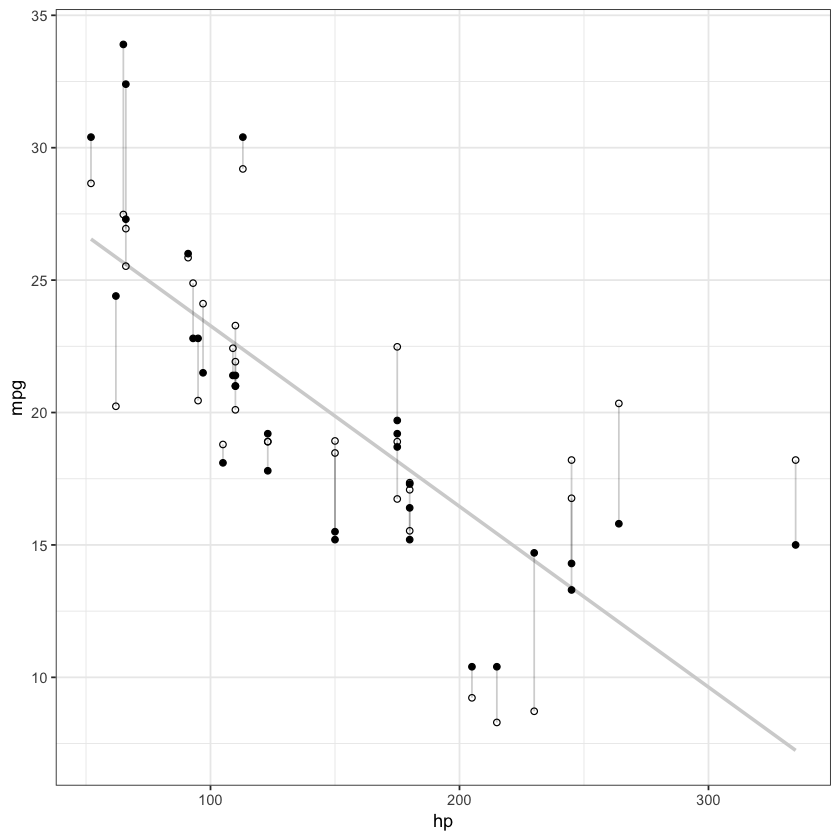

In [89]:
df<- lmCarModel %>% augment()
ggplot(mtcars, aes(x = hp, y = mpg)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +  # Plot regression slope
  geom_segment(aes(xend = hp, yend = df$.fitted), alpha = .2) +  # alpha to fade lines
  geom_point() +
  geom_point(aes(y = df$.fitted), shape = 1) +
  theme_bw()

In [97]:
library(tidyr)

In [98]:
mtcars %>% 
  gather(key = "iv", value = "x", -Sepal.Width) %>%
  ggplot(aes(x = x, y = Sepal.Width)) +
  geom_segment(aes(xend = x, yend = df$.fitted), alpha = .2) +
  geom_point(aes(color = df$.resid)) +
  scale_color_gradient2(low = "blue", mid = "white", high = "red") +
  guides(color = FALSE) +
  geom_point(aes(y = df$.fitted), shape = 1) +
  facet_grid(~ iv, scales = "free_x") +
  theme_bw()

ERROR: `NULL` must evaluate to column positions or names, not a double vector

In [69]:
names(lmCarModel)

[1] ".rownames"  "mpg"        "wt"         ".fitted"    ".se.fit"   
 [6] ".resid"     ".hat"       ".sigma"     ".cooksd"    ".std.resid"

In [70]:
head(lmCarModel)

.rownames,mpg,wt,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
Mazda RX4,21.0,2.620,23.28261,0.6335798,-2.2826106,0.04326896,3.067494,1.327407e-02,-0.76616765
Mazda RX4 Wag,21.0,2.875,21.91977,0.5714319,-0.9197704,0.03519677,3.093068,1.723963e-03,-0.30743051
Datsun 710,22.8,2.320,24.88595,0.7359177,-2.0859521,0.05837573,3.072127,1.543937e-02,-0.70575249
Hornet 4 Drive,21.4,3.215,20.10265,0.5384424,1.2973499,0.03125017,3.088268,3.020558e-03,0.43275114
Hornet Sportabout,18.7,3.440,18.90014,0.5526562,-0.2001440,0.03292182,3.097722,7.599578e-05,-0.06681879
Valiant,18.1,3.460,18.79325,0.5552829,-0.6932545,0.03323551,3.095184,9.210650e-04,-0.23148309


In [71]:
lmCarModel

Warning message:
“Unknown or uninitialised column: 'coef'.”

NULL

In [12]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



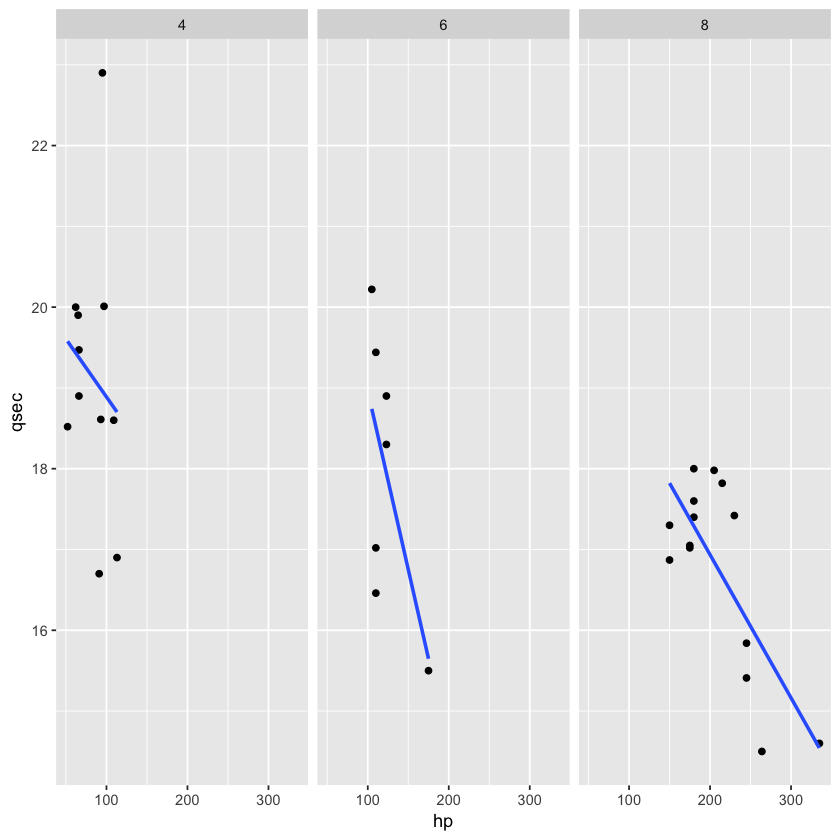

In [17]:
#Another alternative for lm graph
p <- ggplot(mtcars, aes(hp, qsec)) + geom_point()
 p + geom_smooth(method = "lm", se = FALSE) + facet_wrap(~cyl)

In [128]:
x< as.matrix(cbind(1, Petal.Length, Petal.Width))
y<- as.matrix(Petal.Length)
 solve(t(x)%*%x)%*%t(x)%*%y

Warning message in x < as.matrix(cbind(1, Petal.Length, Petal.Width)):
“longer object length is not a multiple of shorter object length”


,Petal.Length,Petal.Width
TRUE,TRUE,FALSE
TRUE,TRUE,TRUE
TRUE,TRUE,FALSE
TRUE,TRUE,FALSE
TRUE,TRUE,FALSE
FALSE,TRUE,FALSE
TRUE,TRUE,FALSE
TRUE,TRUE,FALSE
TRUE,TRUE,FALSE
TRUE,TRUE,FALSE


ERROR: Error in solve(t(x) %*% x) %*% t(x) %*% y: non-conformable arguments


# المسألة
 
We want to create a model that helps us to predict the probability of a vehicle having a V engine or a straight engine given a weight of 2100 lbs and engine displacement of 180 cubic inches.
               
  wt و وون السيارة  disp  بناء على خاصيتي سعة المحرك   inline     او      V      نود انشاء نموذج قادر على التنبؤ باحتمال ان تكون خصائص  محرك سيارة على شكل 
![](imgs/engin.png)
First we fit the model:

We use the glm() function, include the variables in the usual way, and specify a binomial error distribution, as follows:

[the Analysis Factor](https://www.theanalysisfactor.com)

In [53]:
#Generalized Linear Models
modelLM<- glm(vs ~ wt +disp, mtcars, family="binomial")

In [54]:
summary(modelLM)


Call:
glm(formula = vs ~ wt + disp, family = "binomial", data = mtcars)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.67506  -0.28444  -0.08401   0.57281   2.08234  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.60859    2.43903   0.660    0.510  
wt           1.62635    1.49068   1.091    0.275  
disp        -0.03443    0.01536  -2.241    0.025 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.86  on 31  degrees of freedom
Residual deviance: 21.40  on 29  degrees of freedom
AIC: 27.4

Number of Fisher Scoring iterations: 6


#### Deviance
- We see from the estimates of the coefficients that weight influences vs positively, while displacement has a slightly negative effect
- We also see that the coefficient of weight is non-significant (p > 0.05), while the coefficient of displacement is significant
- the estimates (coefficients of the predictors weight and displacement) are now in units called logits
- Deviance is a measure of goodness of fit of a generalized linear model.

The null deviance shows how well the response variable is predicted by a model that includes only the intercept (grand mean) where as residual with inclusion of independent variables. Or rather its'a a measure of badness of fit.  
        - higher numbers indicate worse fit.
        
Above, you can see that addition of 2 (31-29 =2) independent variablesdecreased the deviance to 21.4 from 43.86, a significant reduction in deviance.The Residual Deviance has reduced by 22.46 with a loss of two degrees of freedom.

If your Null Deviance is really small, it means that the Null Model explains the data pretty well. Likewise with your Residual Deviance.


    - The null deviance shows how well the response variable is predicted by a model that includes only the intercept (grand mean).
 #### Fisher’s Scoring
     - the Fisher's Scoring Algorithm needed six iterations to perform the fit. This doesn’t really tell you a lot that you need to know, other than the fact that the model did indeed converge, and had no trouble doing it.
 ####  Information Criteria

The Akaike Information Criterion (AIC) provides a method for assessing the quality of your model through comparison of related models.  It’s based on the Deviance, but penalizes you for making the model more complicated.  Much like adjusted R-squared, it’s intent is to prevent you from including irrelevant predictors.

Remember, our goal here is to calculate a predicted probability of a V engine, for specific values of the predictors: a weight of 2100 lbs and engine displacement of 180 cubic inches.

To do that, we create a data frame called newdata, in which we include the desired values for our prediction.

In [63]:
dataPred<- data.frame(wt=2.32, disp=108)

Now we use the predict() function to calculate the predicted probability. We include the argument type=”response” in order to get our prediction.

In [64]:
predict(modelLM, dataPred, type="response")

1 
0.8406255

The predicted probability is 0.24.

In [59]:
install.packages("ResourceSelection")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [60]:
library(ResourceSelection)

ResourceSelection 0.3-5 	 2019-07-22


In [61]:
hoslem.test(mtcars$vs, fitted(modelLM))


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  mtcars$vs, fitted(modelLM)
X-squared = 6.4717, df = 8, p-value = 0.5945


- Our model seems to fit well because we have no significance difference between the model and the observed Data since P-value is above 0.05.

In [62]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [10]:
A <- structure(list(numeracy = c(6.6, 7.1, 7.3, 7.5, 7.9, 7.9, 8, 
8.2, 8.3, 8.3, 8.4, 8.4, 8.6, 8.7, 8.8, 8.8, 9.1, 9.1, 9.1, 9.3, 
9.5, 9.8, 10.1, 10.5, 10.6, 10.6, 10.6, 10.7, 10.8, 11, 11.1, 
11.2, 11.3, 12, 12.3, 12.4, 12.8, 12.8, 12.9, 13.4, 13.5, 13.6, 
13.8, 14.2, 14.3, 14.5, 14.6, 15, 15.1, 15.7), anxiety = c(13.8, 
14.6, 17.4, 14.9, 13.4, 13.5, 13.8, 16.6, 13.5, 15.7, 13.6, 14, 
16.1, 10.5, 16.9, 17.4, 13.9, 15.8, 16.4, 14.7, 15, 13.3, 10.9, 
12.4, 12.9, 16.6, 16.9, 15.4, 13.1, 17.3, 13.1, 14, 17.7, 10.6, 
14.7, 10.1, 11.6, 14.2, 12.1, 13.9, 11.4, 15.1, 13, 11.3, 11.4, 
10.4, 14.4, 11, 14, 13.4), success = c(0L, 0L, 0L, 1L, 0L, 1L, 
0L, 0L, 1L, 0L, 1L, 1L, 0L, 1L, 0L, 0L, 0L, 0L, 0L, 1L, 0L, 0L, 
1L, 1L, 1L, 0L, 0L, 0L, 1L, 0L, 1L, 0L, 0L, 1L, 1L, 1L, 1L, 1L, 
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L)), .Names = c("numeracy", 
"anxiety", "success"), row.names = c(NA, -50L), class = "data.frame")

In [19]:
attach(A)
names(A)

The following objects are masked from A (pos = 3):

    anxiety, numeracy, success

The following objects are masked from A (pos = 4):

    anxiety, numeracy, success



[1] "numeracy" "anxiety"  "success"

In [21]:
head(A)

numeracy,anxiety,success
6.6,13.8,0
7.1,14.6,0
7.3,17.4,0
7.5,14.9,1
7.9,13.4,0
7.9,13.5,1


In [15]:
mean(A$numeracy)

[1] 10.722

In [22]:
model1 <- glm(success ~ numeracy * anxiety, binomial)

In [23]:
summary(model1)


Call:
glm(formula = success ~ numeracy * anxiety, family = binomial)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.85712  -0.33055   0.02531   0.34931   2.01048  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)
(Intercept)       0.87883   46.45256   0.019    0.985
numeracy          1.94556    4.78250   0.407    0.684
anxiety          -0.44580    3.25151  -0.137    0.891
numeracy:anxiety -0.09581    0.33322  -0.288    0.774

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 68.029  on 49  degrees of freedom
Residual deviance: 28.201  on 46  degrees of freedom
AIC: 36.201

Number of Fisher Scoring iterations: 7


In [40]:
df.residual(model1)

[1] 46

In [41]:
anova(model1)

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,49,68.02920
numeracy,1,17.73804731,48,50.29115
anxiety,1,22.00552914,47,28.28562
numeracy:anxiety,1,0.08491994,46,28.20070


In [29]:
model_numeracy<- glm( success ~ numeracy, binomial)

In [30]:
model_anxiety<- glm( success ~ anxiety , binomial)

In [27]:
range(numeracy)

[1]  6.6 15.7

In [28]:
range(anxiety)

[1] 10.1 17.7

In [35]:
xnumeracy<- seq(0, 15, .01)
ynumeracy<- predict(model_numeracy, list(numeracy=xnumeracy), type="response")

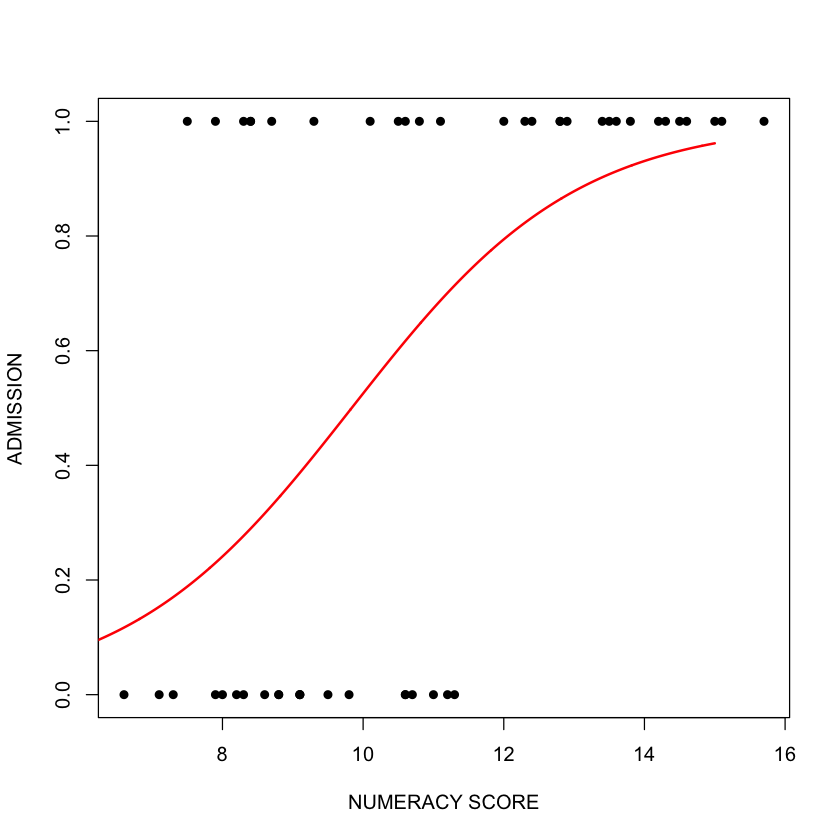

In [36]:
plot(numeracy, success, pch = 16, xlab = "NUMERACY SCORE", ylab = "ADMISSION")
lines(xnumeracy, ynumeracy, col = "red", lwd = 2)

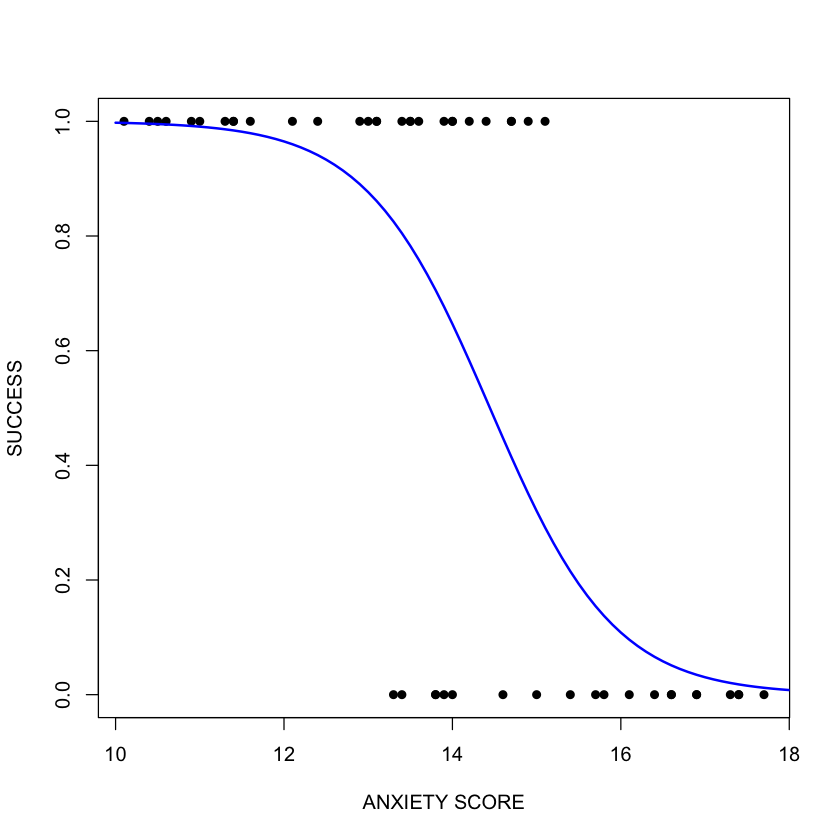

In [37]:
xanxiety <- seq(10, 20, 0.1)

yanxiety <- predict(model_anxiety, list(anxiety=xanxiety),type="response")

plot(anxiety, success, pch = 16, xlab = "ANXIETY SCORE", ylab = "SUCCESS")

lines(xanxiety, yanxiety, col= "blue", lwd = 2)

In [39]:
ggplot(cars,aes(x=as.factor(0),y=speed))+geom_boxplot()

ERROR: Error in ggplot(cars, aes(x = as.factor(0), y = speed)): could not find function "ggplot"


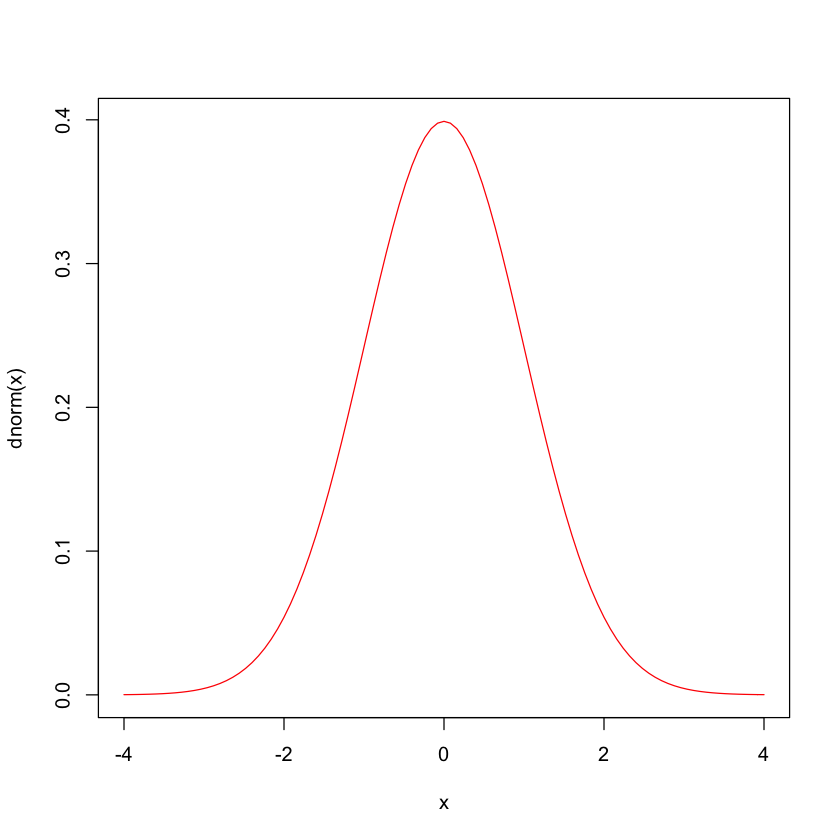

In [1]:
curve(dnorm(x), -4, 4, col = "red")

In [2]:
ggplot(data.frame(x = c(-2, 4)), aes(x)) +
  stat_function(fun = dt, args =list(df =23)) +
  stat_function(fun = dt,   args =list(df =23),
                xlim = c(1.78,4),
                geom = "area") 

ERROR: Error in ggplot(data.frame(x = c(-2, 4)), aes(x)): could not find function "ggplot"


 <h1  style="text-align:center"> هذا هو. الجدول</h1> 


In [151]:
#  santosa و Iris  هذا جدول لعدد اصناف 
table( iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [152]:
(i.am.number<- 12)

[1] 12

In [153]:
data()

In [154]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Residual
5.1,3.5,1.4,0.2,setosa,-0.12954613
4.9,3.0,1.4,0.2,setosa,-0.12954613
4.7,3.2,1.3,0.2,setosa,-0.22954613
4.6,3.1,1.5,0.2,setosa,-0.02954613
5.0,3.6,1.4,0.2,setosa,-0.12954613
5.4,3.9,1.7,0.4,setosa,-0.27553423


In [155]:
tail(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Residual
145,6.7,3.3,5.7,2.5,virginica,-0.958409271
146,6.7,3.0,5.2,2.3,virginica,-1.012421172
147,6.3,2.5,5.0,1.9,virginica,-0.320444974
148,6.5,3.0,5.2,2.0,virginica,-0.343439023
149,6.2,3.4,5.4,2.3,virginica,-0.812421172
150,5.9,3.0,5.1,1.8,virginica,0.002549076


In [156]:
str(iris)

'data.frame':	150 obs. of  6 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Residual    : num  -0.1295 -0.1295 -0.2295 -0.0295 -0.1295 ...


In [157]:
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

In [158]:
?iris

In [160]:
nrow(iris)

[1] 150

In [161]:
attach(iris)
table(Species)

The following objects are masked from iris (pos = 3):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species



Species
    setosa versicolor  virginica 
        50         50         50 

In [238]:
library(corrplot)

corrplot 0.84 loaded


In [241]:
cor<- cor(Petal.Length, Petal.Width, Sepal.Length, Sepal.Width)

Warning message in if (is.na(na.method)) stop("invalid 'use' argument"):
“the condition has length > 1 and only the first element will be used”

ERROR: Error in cor(Petal.Length, Petal.Width, Sepal.Length, Sepal.Width): invalid 'use' argument


In [243]:
corr <- cor(iris)

ERROR: Error in cor(iris): 'x' must be numeric


In [249]:
x<-1:3; y<-101:103
mean(x); mean(y)
sd(x); sd(y)

[1] 2

[1] 102

[1] 1

[1] 1

In [255]:
cor(Petal.Length, Sepal.Width)

[1] -0.4284401

In [232]:
set.seed(1); n = 50; x1 = rnorm(n, 10, 3); x2 = rnorm(n, 15, 3); x3 = rnorm(n, 20, 3)
    dataframe = data.frame(x1,x2,x3)   # Three columns


values,ind
8.120639,x1
10.550930,x1
7.493114,x1
14.785842,x1
10.988523,x1
7.538595,x1
11.462287,x1
12.214974,x1
11.727344,x1
9.083835,x1


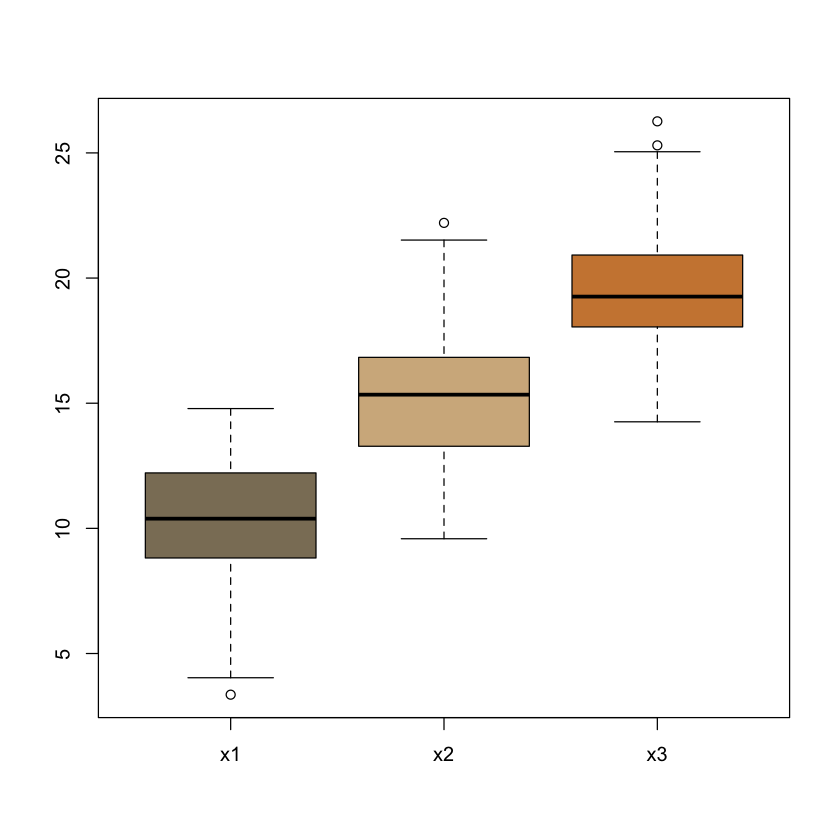

In [233]:
    (datalong = stack(dataframe) )       # Two columns (long format)
    boxplot(dataframe, col=c("wheat4", "tan", "tan3"))

In [272]:
names(dataframe)

[1] "x1" "x2" "x3"

In [271]:
(anov = aov(values ~ ind, datalong))

Call:
   aov(formula = values ~ ind, data = datalong)

Terms:
                     ind Residuals
Sum of Squares  2141.158  1075.764
Deg. of Freedom        2       147

Residual standard error: 2.705203
Estimated effects may be unbalanced

In [2]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [ ]:
attach(mtcars)

In [ ]:
 plot(jitter(cyl, .2),  mpg, pch=19, col="darkgrey")

In [ ]:
(cyls<- unique(cyl))

In [9]:
(n_groups<- length(cyl))

[1] 3

In [17]:
sample_mean<- rep(NA, n_groups)
cis<- matrix(nrow=n_groups, ncol=2)

In [78]:
for(i in 1:n_groups)  {
    #extract relevant Data
    rows<- which(cyl==cyls[i])
    observation<- mpg[rows]
    sample_mean[i]<-mean(observation) 
    stdev<- sd(observation)
    n<- length(observation)
    se_mean<- stdev/sqrt(n)
    cis[i, 1]<- sample_mean[i]- 2*se_mean
    cis[i, 2]<- sample_mean[i]+ 2*se_mean
}

ERROR: Error in 1:n_groups: NA/NaN argument


In [23]:
sample_mean

[1] 21.0 21.0 22.8

In [85]:
 ts = replicate(1000,t.test(rnorm(10),rnorm(10))$statistic)

In [86]:
range(ts)

[1] -4.381428  3.123985

ERROR: Error in density.default(ts): argument 'x' must be numeric


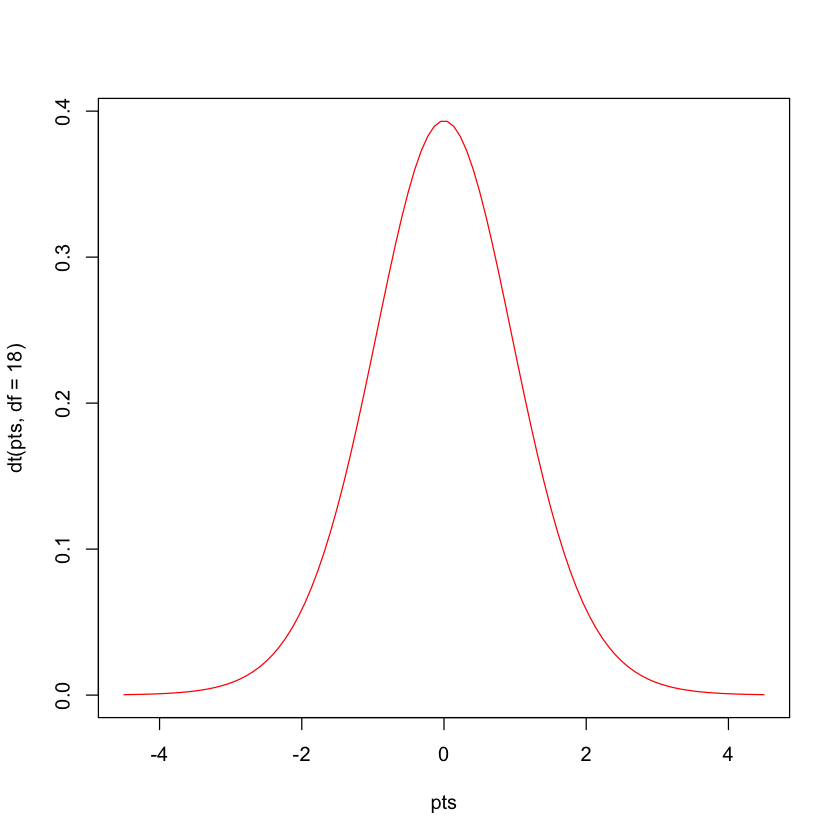

In [77]:
pts<-seq(-4.5, 4.5,length=100)
plot(pts,dt(pts,df=18),col='red',type='l')
lines(density(ts))

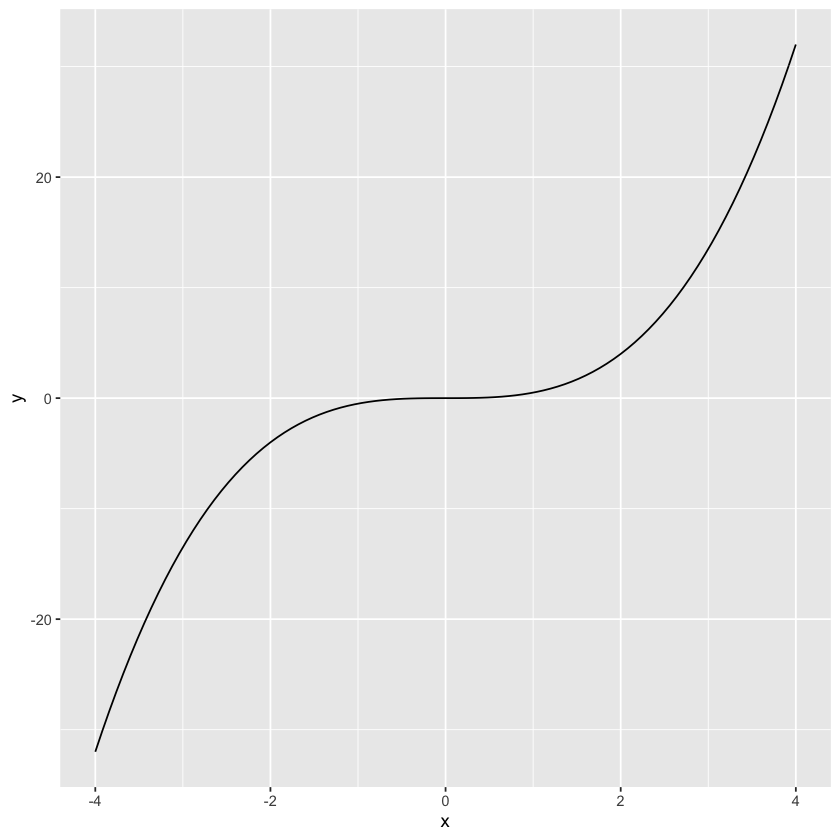

In [79]:
cubeFun <- function(x) {
    x^3 * 0.5
}

 ggplot(data.frame(x = c(-4, 4)), aes(x = x)) +
        stat_function(fun = cubeFun)



<iframe src="https://playground.tensorflow.org" width="1200" height="1000"></iframe>

In [ ]:
<video controls src="imgs/Introduction.mp4" />

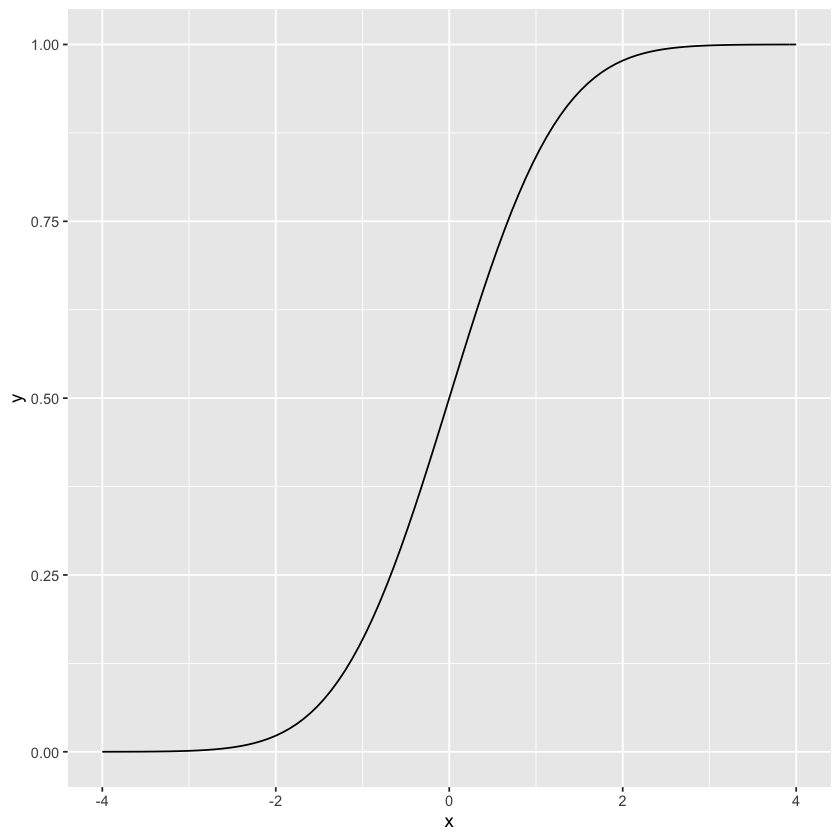

In [74]:
ggplot(data.frame(x = c(-4, 4)), aes(x )) +
        stat_function(fun = pnorm)

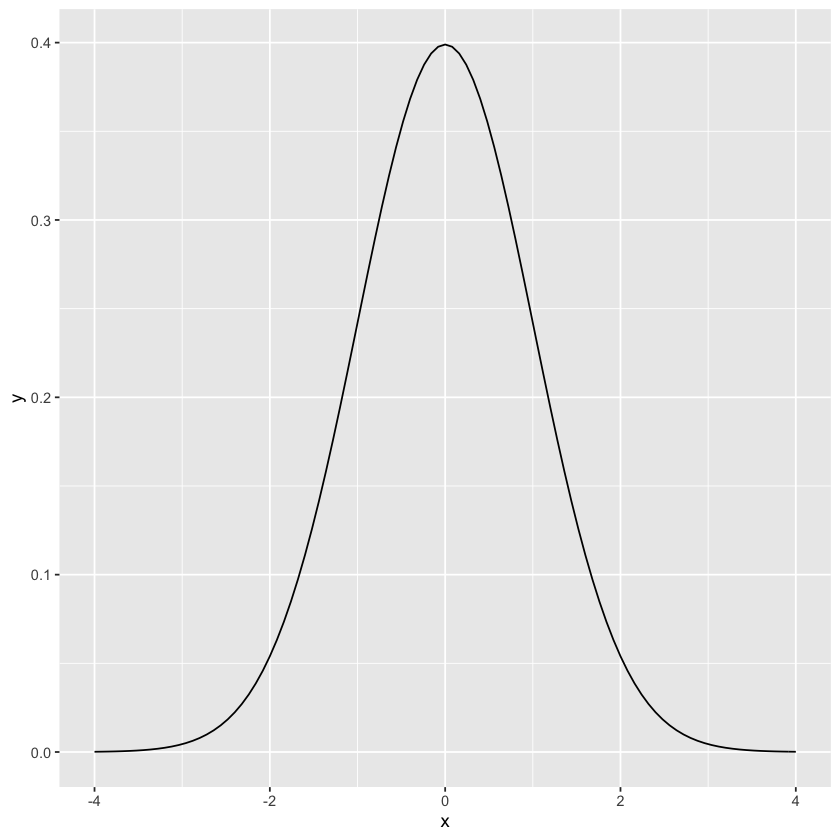

In [76]:
ggplot(data.frame(x = c(-4, 4)), aes(x )) +
        stat_function(fun = dnorm)

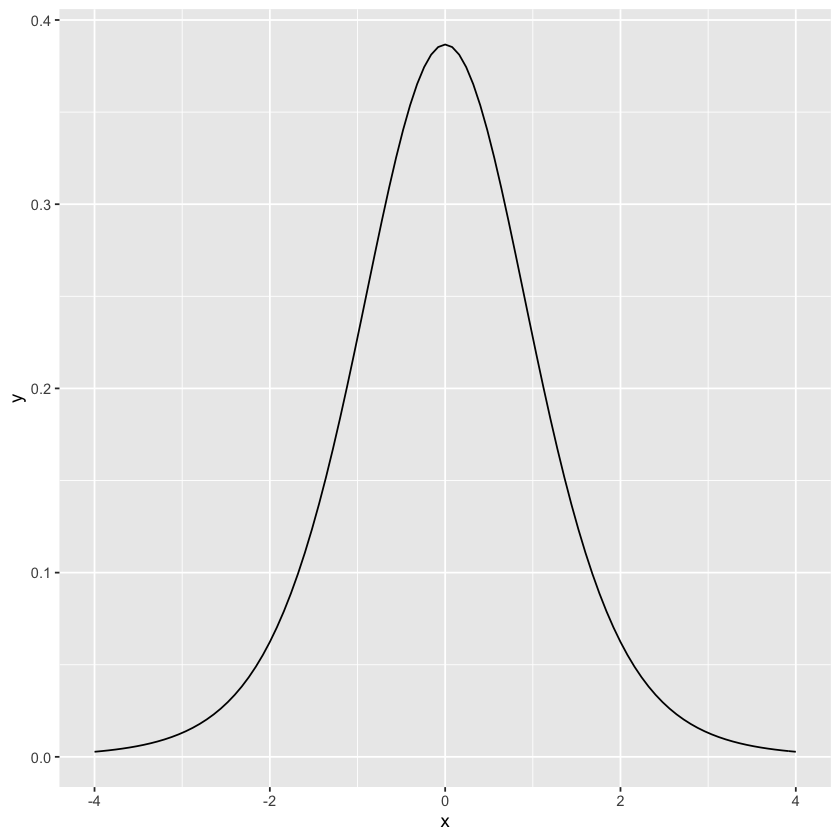

In [75]:
 ggplot(data.frame(x = c(-4, 4)), aes(x = x)) +
        stat_function(fun = dt, args = list(df = 8))

In [84]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Loading required package: maps

Warning message:
“package ‘maps’ was built under R version 3.4.4”


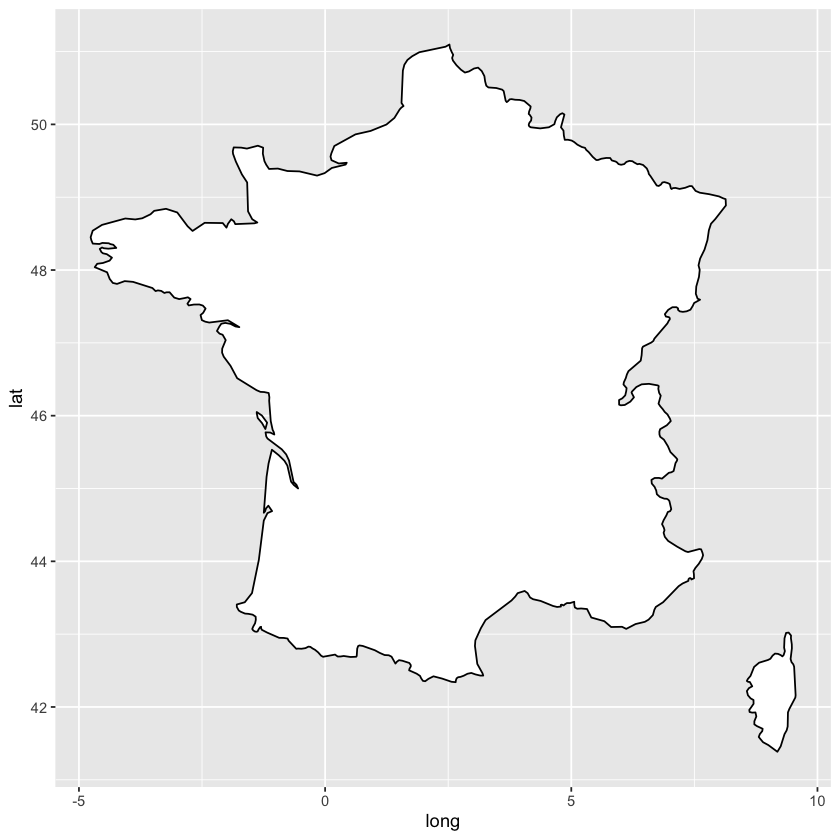

In [92]:
require(maps)
france = map_data('world', region = 'France')
ggplot(france, aes(x = long, y = lat, group = group)) +
  geom_polygon(fill = 'white', colour = 'black')

[1] 0.9505285

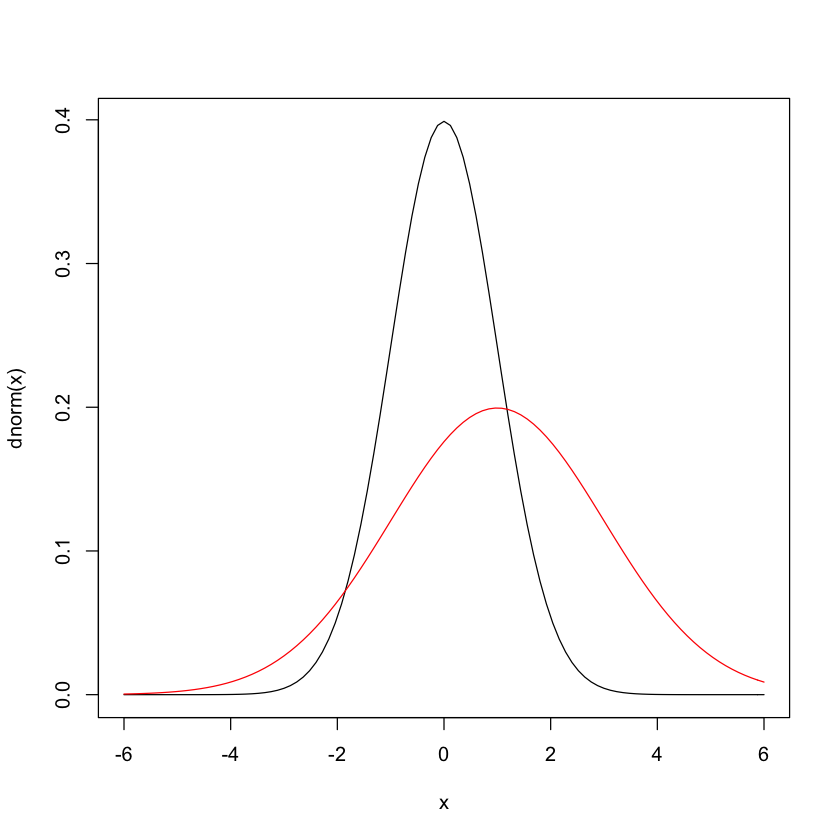

In [98]:
curve(dnorm(x), xlim=c(-6,6))
curve(dnorm(x, mean=1, sd=2), col="red", add=TRUE)
pnorm(1.65)

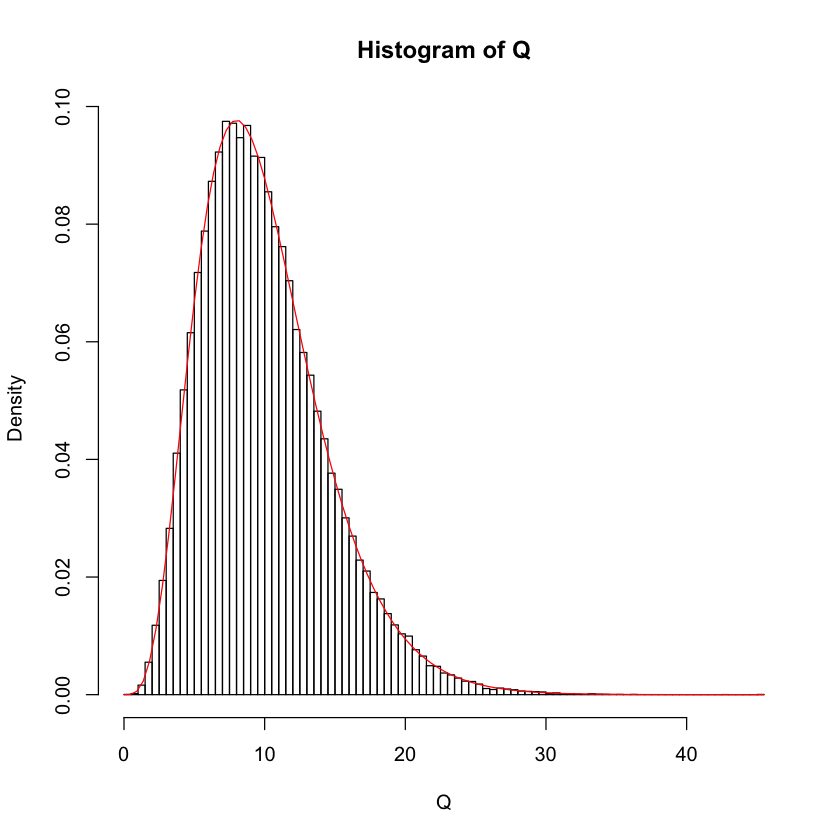

In [99]:
set.seed(90546723)
Q <- rchisq(1e5,10)
hist(Q, freq=FALSE, breaks=100)
curve(dchisq(x,10),col="red",add=TRUE)

In [100]:
pchisq(21.78,10,lower.tail=FALSE)

[1] 0.01626544

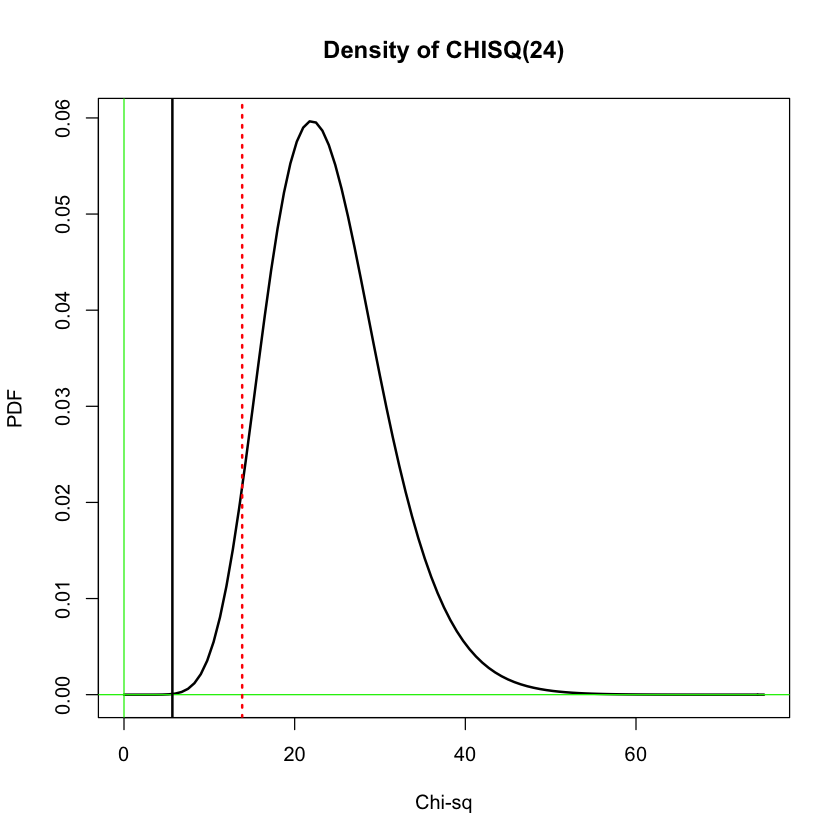

In [104]:
curve(dchisq(x, 24), 0, 75, lwd=2, 
    ylab="PDF", xlab="Chi-sq", main="Density of CHISQ(24)")
 abline(h=0, col="green2"); abline(v=0, col="green2")
 abline(v=13.85, col="red", lwd=2, lty="dotted")
 abline(v = 5.67, lwd=2)